In [70]:
BASELINE_F1SCORE = 0.7994505494505495

In [1]:
from pathlib import Path
import pandas as pd
from get_llms_results import best_result_prompt_template
from llms import llm_dict

eval_df = pd.read_csv(Path('data/eval_dataset.csv'), index_col=0)
eval_df

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
2025-06-15 16:59:57 - huggingface_hub._login - WARNING - Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
2025-06-15 16:59:59 - huggingface_hub._login - WARNING - Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
Note: Environment variable`HF_TOKEN` is set an

,query,reviewer 1,reviewer 2,relevant_results,peer_reviewed,comments,search_engine_results_top_100,search_engine_results_top_200
0,síndrome de Cockett,K94,K73,K99,True,"É uma síndrome de compressão da veia ilíaca, n...","[{'code': 'K99', 'expression': 'Síndrome de Co...","[{'code': 'K99', 'expression': 'Síndrome de Co..."
1,Dormencia,N05|N06,N05|N06|S01,N05|N06,True,NaN,"[{'code': 'N05', 'expression': 'formigamentos'...","[{'code': 'N05', 'expression': 'formigamentos'..."
2,preferecia,NaN,NaN,NaN,True,NaN,"[{'code': 'P09', 'expression': 'Preocupação co...","[{'code': 'P09', 'expression': 'Preocupação co..."
3,espasmo no olho,F16|F95,F16|N08,F16IN08,True,NaN,"[{'code': 'F16', 'expression': 'espasmo do ele...","[{'code': 'F16', 'expression': 'espasmo do ele..."
4,E790,T99,T99,T99,True,NaN,"[{'code': 'T99', 'expression': 'CID-10 E790'},...","[{'code': 'N79', 'expression': 'N79'}, {'code'..."
...,...,...,...,...,...,...,...,...
432,sangramento,A10,A10,A10,True,NaN,"[{'code': 'X08', 'expression': 'sangramento in...","[{'code': 'X08', 'expression': 'sangramento in..."
433,dor coluna,L03|L86|L02|L83|L84,L02|L03,L03|L02,True,NaN,"[{'code': 'L03', 'expression': 'dor lombar'}, ...","[{'code': 'L03', 'expression': 'dor lombar'}, ..."
434,conjutivite viral,F70,F70|F71,F70,True,NaN,"[{'code': 'F70', 'expression': 'conjuntivite v...","[{'code': 'F70', 'expression': 'conjuntivite v..."
435,nao encontrado,NaN,NaN,NaN,True,NaN,"[{'code': 'A96', 'expression': 'encontrado mor...","[{'code': 'A96', 'expression': 'encontrado mor..."


In [2]:
idx = 433
top_k = 10
prompt = best_result_prompt_template.invoke({
                    "query": eval_df.iloc[idx]['query'],
                    "search_engine_results": eval(eval_df.iloc[idx]['search_engine_results_top_200'])[:top_k]
                })
prompt.messages

[SystemMessage(content='You are a helpful medical coder and expert in the International Classification of Primary Care. You will receive a query and a list of results from an ICPC search engine. Your  task is to select the result that best matches the query. Your response should be a single ICPC code between the XML tags <answer>selected_code</answer>. If there is no result good enough to match the given query, return an empty answer: <answer></answer>.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content="Query: dor coluna\n\nSearch engine results: [{'code': 'L03', 'expression': 'dor lombar'}, {'code': 'L02', 'expression': 'dor nas costas'}, {'code': 'L02', 'expression': 'dor vertebral'}, {'code': 'L02', 'expression': 'dor no dorso'}, {'code': 'L01', 'expression': 'dor cervical'}, {'code': 'L02', 'expression': 'dores nas costas'}, {'code': 'L03', 'expression': 'dor vertebral lombar baixa'}, {'code': 'L03', 'expression': 'dor dorsal baixa'}, {'code': 'L02', 'expression'

In [3]:
pd.read_csv(Path('data\icpc_2_annotations.csv')).drop(columns=['Registros']).to_latex('icpc_2_annotations.tex', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\3152586943.py:1: SyntaxWarning: invalid escape sequence '\i'
  pd.read_csv(Path('data\icpc_2_annotations.csv')).drop(columns=['Registros']).to_latex('icpc_2_annotations.tex', index=False)


In [4]:
import pandas as pd
from pathlib import Path

# Create relevant datasets
metrics_path = Path('metrics')
metrics_path.mkdir(exist_ok=True)

# Reload the new datasets
results_df = pd.read_csv(Path('data/llms_results.csv'))
results_df = results_df.fillna('')
eval_df = pd.read_csv(Path("data/eval_dataset.csv"), index_col=0)
eval_df['relevant_results'] = eval_df['relevant_results'].fillna('')

# Make sure there are no duplicates in the query column
eval_df = eval_df.drop_duplicates(subset="query")
results_df = results_df.drop_duplicates(subset="query")

In [5]:
# Extract model columns dynamically (excluding metadata and timedelta columns)
model_columns = [col for col in results_df.columns 
                 if "top-" in col and 
                 "-timedelta" not in col and 
                 "-response-metadata" not in col and
                 "tokens" not in col
]


In [6]:
import re

def extract_answer(text):
    right_answer_format = False
    try:
        match = re.search(r"<answer>(.*?)</answer>", text)
        selected_code = match.group(1)
        right_answer_format = True
        return selected_code, right_answer_format
    except:
        return "", right_answer_format

extract_answer("<answer selected_code='A01'></answer>")

('', False)

In [7]:
# Load valid ICPC-2 codes
icpc_df = pd.read_csv(Path('data/icpc-2_partial.csv'), index_col=0)
valid_icpc_codes = icpc_df['code'].to_list()

In [8]:
from typing import Optional
import jsonlines
from pydantic import BaseModel

class EvalResult(BaseModel):
    model_top_k_name: str
    model: str
    top_k: int
    query: str
    prediction: str
    selected_code: str
    empty_answer: bool
    right_answer_format: bool
    is_valid_icpc_2_code: bool
    selected_code_is_in_relevant_codes: bool
    selected_code_is_in_search_results: bool
    no_relevant_code: bool
    relevant_code_is_in_search_results: bool
    relevant_code_indices_in_search_results: Optional[list[int]] = None
    true_positive: bool
    false_positive: bool
    true_negative: bool
    false_negative: bool
    ideal_scn_true_positive: bool
    ideal_scn_false_positive: bool
    ideal_scn_true_negative: bool
    ideal_scn_false_negative: bool

def eval_model_prediction(
        model: str, 
        top_k: int,
        query: str,
        prediction: str, 
        relevant_codes: list[str], 
        top_k_search_results: list[str]) -> EvalResult:
    """
    Evaluate the model prediction against the relevant codes and search results.
    
    Args:
        prediction (str): The predicted code from the model.
        relevant_codes (list[str]): A list of codes that are relevant to the query.
        search_results (list[str]): A list of search results for the query.
        top_k (int): The number of search results to consider.

    Returns:
        dict[bool]: A dictionary containing the evaluation results.
    """
    # Relevant information
    empty_answer = False
    is_valid_icpc_2_code = False
    selected_code_is_in_relevant_codes = False
    selected_code_is_in_search_results = False
    no_relevant_code = False
    relevant_code_is_in_search_results = False
    relevant_code_indices_in_search_results = None

    # Check if there is only one or zero selected code
    selected_code, right_answer_format = extract_answer(prediction)
    if selected_code == "":
        empty_answer = True

    # If there is a code, check if it is a valid ICPC-2 code
    if selected_code in valid_icpc_codes:
        is_valid_icpc_2_code = True

    # If it is valid, check if it is in the relevant codes
    if (
        len(relevant_codes)>0 and 
        empty_answer == False and 
        selected_code in relevant_codes
        ):
        selected_code_is_in_relevant_codes = True
    
    # Check if there are any relevant codes
    if len(relevant_codes) == 0:
        no_relevant_code = True

    # If it is valid, check if it is in the search results
    if selected_code != "" and selected_code in top_k_search_results:
        selected_code_is_in_search_results = True

    # If there is a relevant code, check if it is in the search results
    if len(relevant_codes)>0:
        for code in relevant_codes:
            if code in top_k_search_results:
                relevant_code_is_in_search_results = True
    
    # If there are relevant codes in the search results, store the first occurrence of each relevant code present in the search results
    if relevant_code_is_in_search_results:
        idx = []
        for code in relevant_codes:
            if code in top_k_search_results:
                idx.append(top_k_search_results.index(code))
        relevant_code_indices_in_search_results = idx

    # Contingency table
    true_positive, true_negative, false_positive, false_negative = False, False, False, False
    if empty_answer == False and selected_code_is_in_relevant_codes:
        true_positive = True
    elif empty_answer == True and no_relevant_code == True:
        true_negative = True
    elif (
        (empty_answer == False and no_relevant_code == True) or 
        (empty_answer == False and no_relevant_code == False and selected_code_is_in_relevant_codes == False)):
        false_positive = True
    elif (
        empty_answer == True and no_relevant_code == False
    ):
        false_negative = True

    assert sum([true_positive, true_negative, false_positive, false_negative])==1, "Something wrong with correctness rules..."

    # Contingency table with a perfect retriever scenario in which:
    # - when there is a relevant code to select, it is present in the search results
    # - when there is no relevant code to select, we keep as it is
    ideal_scn_true_positive, ideal_scn_true_negative, ideal_scn_false_positive, ideal_scn_false_negative = False, False, False, False
    if empty_answer == False and selected_code_is_in_relevant_codes:
        ideal_scn_true_positive = True
    elif empty_answer == True and no_relevant_code == True:
        ideal_scn_true_negative = True
    elif (
        (empty_answer == False and no_relevant_code == True) or 
        (empty_answer == False and no_relevant_code == False and selected_code_is_in_relevant_codes == False and relevant_code_is_in_search_results)):
        ideal_scn_false_positive = True
    elif (
        empty_answer == True and no_relevant_code == False
    ):
        ideal_scn_false_negative = True

    assert sum([ideal_scn_true_positive, ideal_scn_true_negative, ideal_scn_false_positive, ideal_scn_false_negative])<=1, "Something wrong with correctness rules..."


    return EvalResult(
        model_top_k_name=f'{model}-top-{top_k}',
        model=model,
        top_k=top_k,
        query=query,
        prediction=prediction,
        selected_code=selected_code,
        empty_answer=empty_answer,
        right_answer_format=right_answer_format,
        is_valid_icpc_2_code=is_valid_icpc_2_code,
        selected_code_is_in_relevant_codes=selected_code_is_in_relevant_codes,
        selected_code_is_in_search_results=selected_code_is_in_search_results,
        no_relevant_code=no_relevant_code,
        relevant_code_is_in_search_results=relevant_code_is_in_search_results,
        relevant_code_indices_in_search_results=relevant_code_indices_in_search_results,
        true_positive=true_positive,
        true_negative=true_negative,
        false_positive=false_positive,
        false_negative=false_negative,
        ideal_scn_true_positive=ideal_scn_true_positive,
        ideal_scn_true_negative=ideal_scn_true_negative,
        ideal_scn_false_positive=ideal_scn_false_positive,
        ideal_scn_false_negative=ideal_scn_false_negative,
    )

def get_query_top_k_codes(query: str, top_k: int):
    top_k_results = eval(eval_df[eval_df['query']==query]['search_engine_results_top_200'].values[0])[:top_k]
    return [r['code'] for r in top_k_results]

def eval_model_predictions(
        model: str, 
        top_k: int,
        ) -> None:
    
    predictions_data = []
    for row in results_df.to_dict('records'):
        relevant_results = eval_df[eval_df['query']==row['query']]['relevant_results'].values[0]
        predictions_data.append(
            eval_model_prediction(
                model=model,
                top_k=top_k,
                query=row['query'],
                prediction=row[f'{model}-top-{top_k}'],
                relevant_codes=relevant_results.split('|') if relevant_results != '' else [],
                top_k_search_results=get_query_top_k_codes(row['query'], top_k)
            ).model_dump()
        )
    
    with jsonlines.open(Path(f'metrics/{model}-top-{top_k}.jsonl'), mode='w') as writer:
        for obj in predictions_data:
            writer.write(obj)


In [9]:
from tqdm import tqdm 

for model_name in tqdm(model_columns, desc="Gathering eval data from models' predictions..."):
    model, top_k = model_name.split('-top-')
    eval_model_predictions(model=model, top_k=int(top_k))

Gathering eval data from models' predictions...: 100%|██████████| 162/162 [01:50<00:00,  1.47it/s]


In [10]:
# Load data into a dataframe
metrics_df = pd.DataFrame()
for model_name in tqdm(model_columns, desc="Gathering eval data from models' predictions..."):
    model, top_k = model_name.split('-top-')
    metrics_df = pd.concat([metrics_df, pd.read_json(Path(f'metrics/{model}-top-{top_k}.jsonl'), lines=True)], axis=0)

Gathering eval data from models' predictions...: 100%|██████████| 162/162 [00:02<00:00, 60.44it/s]


In [11]:
metrics_df.to_csv(Path('metrics/predictions_data.csv'))

In [12]:
metrics_df[(metrics_df['model_top_k_name']=='gpt-4o-mini-top-100') & (metrics_df['empty_answer']==False)]['selected_code_is_in_search_results'].mean()

np.float64(1.0)

In [13]:
metrics_df

,model_top_k_name,model,top_k,query,prediction,selected_code,empty_answer,right_answer_format,is_valid_icpc_2_code,selected_code_is_in_relevant_codes,...,relevant_code_is_in_search_results,relevant_code_indices_in_search_results,true_positive,false_positive,true_negative,false_negative,ideal_scn_true_positive,ideal_scn_false_positive,ideal_scn_true_negative,ideal_scn_false_negative
0,gpt-4o-mini-top-10,gpt-4o-mini,10,síndrome de Cockett,<answer>K99</answer>,K99,False,True,True,True,...,True,[0],True,False,False,False,True,False,False,False
1,gpt-4o-mini-top-10,gpt-4o-mini,10,Dormencia,<answer>N05</answer>,N05,False,True,True,True,...,True,[0],True,False,False,False,True,False,False,False
2,gpt-4o-mini-top-10,gpt-4o-mini,10,preferecia,<answer>P09</answer>,P09,False,True,True,False,...,False,None,False,True,False,False,False,True,False,False
3,gpt-4o-mini-top-10,gpt-4o-mini,10,espasmo no olho,<answer>F95</answer>,F95,False,True,True,False,...,False,None,False,True,False,False,False,False,False,False
4,gpt-4o-mini-top-10,gpt-4o-mini,10,E790,<answer>T99</answer>,T99,False,True,True,True,...,True,[6],True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,llama-3.2-1B-instruct-grpo-005-step-1000-top-100,llama-3.2-1B-instruct-grpo-005-step-1000,100,sangramento,"<think>The query ""sangramento"" suggests that t...",X08,False,True,True,False,...,True,[1],False,True,False,False,False,True,False,False
431,llama-3.2-1B-instruct-grpo-005-step-1000-top-100,llama-3.2-1B-instruct-grpo-005-step-1000,100,dor coluna,"<think>The best match for the query ""dor colun...",L02,False,True,True,True,...,True,"[0, 1]",True,False,False,False,True,False,False,False
432,llama-3.2-1B-instruct-grpo-005-step-1000-top-100,llama-3.2-1B-instruct-grpo-005-step-1000,100,conjutivite viral,"<think>The query ""conjutivite viral"" seems to ...",F70,False,True,True,True,...,True,[0],True,False,False,False,True,False,False,False
433,llama-3.2-1B-instruct-grpo-005-step-1000-top-100,llama-3.2-1B-instruct-grpo-005-step-1000,100,nao encontrado,"<think>The query ""nao encontrado"" suggests tha...",A96,False,True,True,False,...,False,None,False,True,False,False,False,True,False,False


In [14]:
# Compute relevant metrics
metrics = []
eps = 1e-16

for model_name in tqdm(model_columns, desc="Computing relevant metrics..."):
    model, top_k = model_name.split('-top-')
    results = {
        'model': model,
        'top_k': top_k,
        'model_top_k_name': f'{model}-top-{top_k}',
    }

    # Rate of answers with right format
    results['right_answer_format'] = metrics_df[(metrics_df['model_top_k_name']==f'{model}-top-{top_k}')]['right_answer_format'].mean()
    
    # Rate of answers with valid ICPC-2 codes
    results['valid_icpc_2_code_rate'] = metrics_df[(metrics_df['model_top_k_name']==f'{model}-top-{top_k}') & (metrics_df['empty_answer']==False)]['is_valid_icpc_2_code'].mean()

    # Rate of relevant code present in the search results
    results['relevant_code_is_in_search_results'] = metrics_df[(metrics_df['model_top_k_name']==f'{model}-top-{top_k}')]['relevant_code_is_in_search_results'].mean()

    # Rate of non empty answers in which the selected code was in the search results
    results['selected_code_is_in_search_results'] = metrics_df[(metrics_df['model_top_k_name']==f'{model}-top-{top_k}') & (metrics_df['empty_answer']==False)]['selected_code_is_in_search_results'].mean()

    # Rate of selected codes that are in the relevant codes considering empty answers and empty relevant codes
    results['selected_code_is_in_relevant_codes'] = metrics_df[(metrics_df['model_top_k_name']==f'{model}-top-{top_k}')]['selected_code_is_in_relevant_codes'].mean()

    # Rate of selected codes that are in the relevant codes considering empty answers and empty relevant codes when the relevant codes are in the search results
    results['selected_code_is_in_relevant_codes_and_in_search_results'] = metrics_df[(metrics_df['model_top_k_name']==f'{model}-top-{top_k}')&(metrics_df['relevant_code_is_in_search_results']==True)]['selected_code_is_in_relevant_codes'].mean()

    # Precision
    true_positives = len(metrics_df[(metrics_df['model_top_k_name']==f'{model}-top-{top_k}')
                                    &(metrics_df['true_positive']==True)])
    
    false_positives = len(metrics_df[(metrics_df['model_top_k_name']==f'{model}-top-{top_k}')
                                     &(metrics_df['false_positive']==True)])
    
    results['precision'] = true_positives / (true_positives + false_positives + eps)

    # Recall
    false_negatives = len(metrics_df[(metrics_df['model_top_k_name']==f'{model}-top-{top_k}')&(metrics_df['false_negative']==True)])
    results['recall'] = true_positives / (true_positives + false_negatives + eps)

    # F1 score
    results['f1_score'] = 2 * results['precision'] * results['recall'] / (results['precision'] + results['recall'] + eps)
    
    # Ideal retriever scenario
    # Precision
    ideal_scn_true_positives = len(metrics_df[(metrics_df['model_top_k_name']==f'{model}-top-{top_k}')
                                    &(metrics_df['ideal_scn_true_positive']==True)])
    
    ideal_scn_false_positives = len(metrics_df[(metrics_df['model_top_k_name']==f'{model}-top-{top_k}')
                                     &(metrics_df['ideal_scn_false_positive']==True)])
    
    results['ideal_scn_precision'] = ideal_scn_true_positives / (ideal_scn_true_positives + ideal_scn_false_positives + eps)

    # Recall
    ideal_scn_false_negatives = len(metrics_df[(metrics_df['model_top_k_name']==f'{model}-top-{top_k}')&(metrics_df['ideal_scn_false_negative']==True)])
    results['ideal_scn_recall'] = ideal_scn_true_positives / (ideal_scn_true_positives + ideal_scn_false_negatives + eps)

    # F1 score
    results['ideal_scn_f1_score'] = 2 * results['ideal_scn_precision'] * results['ideal_scn_recall'] / (results['ideal_scn_precision'] + results['ideal_scn_recall'] + eps)

    metrics.append(results)


computed_metrics_df = pd.DataFrame.from_records(metrics).sort_values('f1_score', ascending=False)
computed_metrics_df.to_csv(Path('metrics/computed_metrics.csv'))
computed_metrics_df.head(10)


Computing relevant metrics...: 100%|██████████| 162/162 [00:07<00:00, 20.64it/s]


,model,top_k,model_top_k_name,right_answer_format,valid_icpc_2_code_rate,relevant_code_is_in_search_results,selected_code_is_in_search_results,selected_code_is_in_relevant_codes,selected_code_is_in_relevant_codes_and_in_search_results,precision,recall,f1_score,ideal_scn_precision,ideal_scn_recall,ideal_scn_f1_score
11,gpt-4.5-preview,100,gpt-4.5-preview-top-100,1.000000,1.000000,0.859770,0.992481,0.747126,0.863636,0.814536,0.942029,0.873656,0.835476,0.942029,0.885559
138,o3,100,o3-top-100,1.000000,1.000000,0.859770,0.997590,0.760920,0.885027,0.797590,0.965015,0.873351,0.821340,0.965015,0.887399
86,gpt-4.5-preview,200,gpt-4.5-preview-top-200,1.000000,0.997494,0.868966,0.992481,0.744828,0.851852,0.812030,0.939130,0.870968,0.828645,0.939130,0.880435
135,o3,10,o3-top-10,1.000000,1.000000,0.827586,1.000000,0.749425,0.905556,0.812968,0.934097,0.869333,0.853403,0.934097,0.891929
10,gpt-4.5-preview,50,gpt-4.5-preview-top-50,1.000000,1.000000,0.848276,0.992519,0.742529,0.869919,0.805486,0.938953,0.867114,0.830334,0.938953,0.881310
88,DeepSeek-V3,200,DeepSeek-V3-top-200,1.000000,1.000000,0.868966,1.000000,0.747126,0.859788,0.788835,0.955882,0.864362,0.808458,0.955882,0.876011
9,gpt-4.5-preview,20,gpt-4.5-preview-top-20,1.000000,1.000000,0.839080,0.994949,0.731034,0.868493,0.803030,0.924419,0.859459,0.830287,0.924419,0.874828
110,gemini-2.5-pro-exp-03-25,200,gemini-2.5-pro-exp-03-25-top-200,0.997701,1.000000,0.868966,1.000000,0.744828,0.857143,0.775120,0.964286,0.859416,0.798030,0.964286,0.873315
54,DeepSeek-V3,50,DeepSeek-V3-top-50,1.000000,1.000000,0.848276,1.000000,0.733333,0.864499,0.793532,0.935484,0.858681,0.815857,0.935484,0.871585
109,gemini-2.5-pro-exp-03-25,100,gemini-2.5-pro-exp-03-25-top-100,0.995402,1.000000,0.859770,1.000000,0.740230,0.860963,0.783455,0.949853,0.858667,0.802993,0.949853,0.870270


In [15]:
detailed_f1_table = computed_metrics_df
detailed_f1_table['top_k'] = detailed_f1_table['top_k'].astype(int)
detailed_f1_table = detailed_f1_table.sort_values(by=['model','top_k'], ascending=True).reset_index(drop=True)
detailed_f1_table[['model', 'top_k', 'precision', 'recall', 'f1_score']].to_latex('detailed_f1_table.tex', index=False, float_format="%.4f")

In [16]:
detailed_f1_table = computed_metrics_df
detailed_f1_table['top_k'] = detailed_f1_table['top_k'].astype(int)
detailed_f1_table = detailed_f1_table.sort_values(by=['model','top_k'], ascending=True).reset_index(drop=True)
detailed_f1_table[['model', 'top_k', 'ideal_scn_precision', 'ideal_scn_recall', 'ideal_scn_f1_score']].to_latex('detailed_ideal_f1_table.tex', index=False, float_format="%.4f")

In [17]:
computed_metrics_df['top_k'] = computed_metrics_df['top_k'].astype(int)
computed_metrics_df[['model', 'top_k', 'f1_score', 'ideal_scn_f1_score', 'right_answer_format', 'relevant_code_is_in_search_results']].sort_values(by=['f1_score'], ascending=False).head(20)

,model,top_k,f1_score,ideal_scn_f1_score,right_answer_format,relevant_code_is_in_search_results
11,gpt-4.5-preview,100,0.873656,0.885559,1.000000,0.859770
138,o3,100,0.873351,0.887399,1.000000,0.859770
86,gpt-4.5-preview,200,0.870968,0.880435,1.000000,0.868966
135,o3,10,0.869333,0.891929,1.000000,0.827586
10,gpt-4.5-preview,50,0.867114,0.881310,1.000000,0.848276
88,DeepSeek-V3,200,0.864362,0.876011,1.000000,0.868966
9,gpt-4.5-preview,20,0.859459,0.874828,1.000000,0.839080
110,gemini-2.5-pro-exp-03-25,200,0.859416,0.873315,0.997701,0.868966
54,DeepSeek-V3,50,0.858681,0.871585,1.000000,0.848276
109,gemini-2.5-pro-exp-03-25,100,0.858667,0.870270,0.995402,0.859770


In [18]:
piv_df = computed_metrics_df.pivot(index='model', columns='top_k', values='f1_score')
piv_df['mean_f1_score'] = piv_df.apply(lambda x: x.mean(), axis=1)
piv_df['max_f1_score'] = piv_df.apply(lambda x: x.max(), axis=1)
summ_piv_df = piv_df.sort_values('max_f1_score', ascending=False)[['mean_f1_score', 'max_f1_score']]
summ_piv_df

top_k,mean_f1_score,max_f1_score
model,,
gpt-4.5-preview,0.865513,0.873656
o3,0.862998,0.873351
DeepSeek-V3,0.854453,0.864362
gemini-2.5-pro-exp-03-25,0.851347,0.859416
o3-mini,0.850513,0.857916
Llama-4-Maverick-Instruct-Basic,0.843506,0.857143
gpt-4.1-mini,0.852646,0.856764
gemini-2.0-pro-exp-02-05,0.848887,0.856764
DeepSeek-R1,0.842521,0.855615


In [19]:
summ_piv_df.columns = ['Mean F1 score', 'Max F1 score']
summ_piv_df.index.name = 'Model'
summ_piv_df.to_latex('llm_summary_f1_scores.tex', index=True, float_format="%.4f")

In [20]:
ideal_piv_df = computed_metrics_df.pivot(index='model', columns='top_k', values='ideal_scn_f1_score')
ideal_piv_df['mean_ideal_f1_score'] = ideal_piv_df.apply(lambda x: x.mean(), axis=1)
ideal_piv_df['max_ideal_f1_score'] = ideal_piv_df.apply(lambda x: x.max(), axis=1)
summ_ideal_piv_df = ideal_piv_df.sort_values('max_ideal_f1_score', ascending=False)[['mean_ideal_f1_score', 'max_ideal_f1_score']]
summ_ideal_piv_df

top_k,mean_ideal_f1_score,max_ideal_f1_score
model,,
o3,0.882119,0.891929
gpt-4.5-preview,0.879253,0.885559
gemini-2.0-pro-exp-02-05,0.867294,0.877579
gpt-4.1-mini,0.873395,0.876560
gemma-3-27b-it,0.857486,0.876404
DeepSeek-V3,0.867367,0.876011
Llama-4-Maverick-Instruct-Basic,0.865504,0.875676
gemini-2.5-pro-exp-03-25,0.868843,0.873315
o3-mini,0.863928,0.870879


In [21]:
summ_ideal_piv_df.columns = ['Mean ideal F1 score', 'Max ideal F1 score']
summ_ideal_piv_df.index.name = 'Model'
summ_ideal_piv_df.to_latex('llm_summary_ideal_f1_scores.tex', index=True, float_format="%.4f")

In [22]:
pd.merge(summ_piv_df, summ_ideal_piv_df, on='Model').to_csv('llm_summary.csv')

In [23]:
full_piv_df = computed_metrics_df.pivot(index='model', columns='top_k', values='f1_score')
full_piv_df['mean_f1_score'] = full_piv_df.apply(lambda x: x.mean(), axis=1)
full_piv_df['max_f1_score'] = full_piv_df.apply(lambda x: x.max(), axis=1)
full_piv_df.fillna('').sort_values('max_f1_score', ascending=False).to_latex('llm_summary_full.tex', index=True, float_format="%.4f", longtable=True)

In [24]:
ideal_full_piv_df = computed_metrics_df.pivot(index='model', columns='top_k', values='ideal_scn_f1_score')
ideal_full_piv_df['mean_f1_score'] = ideal_full_piv_df.apply(lambda x: x.mean(), axis=1)
ideal_full_piv_df['max_f1_score'] = ideal_full_piv_df.apply(lambda x: x.max(), axis=1)
ideal_full_piv_df.fillna('').sort_values('max_f1_score', ascending=False).to_latex('llm_summary_full_ideal.tex', index=True, float_format="%.4f", longtable=True)

In [25]:
llms_results_df = pd.read_csv(Path('data\llms_results.csv'))
llms_results_df[['query', 'gpt-4o-mini-top-10', 'gpt-4o-mini-top-10-timedelta',
       'gpt-4o-mini-top-10-response-metadata']]

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\500686816.py:1: SyntaxWarning: invalid escape sequence '\l'
  llms_results_df = pd.read_csv(Path('data\llms_results.csv'))


,query,gpt-4o-mini-top-10,gpt-4o-mini-top-10-timedelta,gpt-4o-mini-top-10-response-metadata
0,síndrome de Cockett,<answer>K99</answer>,0 days 00:00:00.830294,"{'token_usage': {'completion_tokens': 8, 'prom..."
1,Dormencia,<answer>N05</answer>,0 days 00:00:00.459110,"{'token_usage': {'completion_tokens': 8, 'prom..."
2,preferecia,<answer>P09</answer>,0 days 00:00:00.464856,"{'token_usage': {'completion_tokens': 8, 'prom..."
3,espasmo no olho,<answer>F95</answer>,0 days 00:00:00.609378,"{'token_usage': {'completion_tokens': 9, 'prom..."
4,E790,<answer>T99</answer>,0 days 00:00:00.413006,"{'token_usage': {'completion_tokens': 8, 'prom..."
...,...,...,...,...
432,sangramento,<answer>A10</answer>,0 days 00:00:00.454272,"{'token_usage': {'completion_tokens': 8, 'prom..."
433,dor coluna,<answer>L02</answer>,0 days 00:00:00.562113,"{'token_usage': {'completion_tokens': 8, 'prom..."
434,conjutivite viral,<answer>F70</answer>,0 days 00:00:00.628573,"{'token_usage': {'completion_tokens': 9, 'prom..."
435,nao encontrado,<answer>A99</answer>,0 days 00:00:00.890160,"{'token_usage': {'completion_tokens': 8, 'prom..."


In [26]:
model = 'gpt-4o-mini'
top_k = '10'

pd.to_timedelta(llms_results_df[f'{model}-top-{top_k}-timedelta']).dt.total_seconds()
response_metadata = eval(llms_results_df[f'{model}-top-{top_k}-response-metadata'].iloc[0])

In [27]:
pd.to_timedelta(llms_results_df[f'{model}-top-{top_k}-timedelta'].iloc[0]).total_seconds()

0.830294

In [28]:
# input tokens
llms_results_df[f'{model}-top-{top_k}-input_tokens'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(
    lambda x: eval(x)['token_usage']['prompt_tokens']
)

# output tokens
llms_results_df[f'{model}-top-{top_k}-output_tokens'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(
    lambda x: eval(x)['token_usage']['completion_tokens']
)

# total tokens
llms_results_df[f'{model}-top-{top_k}-total_tokens'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(
    lambda x: eval(x)['token_usage']['total_tokens']
)

# reasoning tokens
def get_reasoning_tokens(x):
    x = eval(x)
    if (
        'token_usage' in x 
        and 
        'completion_tokens_details' in x['token_usage'] 
        and 
        'reasoning_tokens' in x['token_usage']['completion_tokens_details']
        ):
        return x['token_usage']['completion_tokens_details']['reasoning_tokens']
    else:
        return None

llms_results_df[f'{model}-top-{top_k}-reasoning_tokens'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(get_reasoning_tokens)

In [29]:
llms_results_df[f'{model}-top-{top_k}-reasoning_tokens']

0      0
1      0
2      0
3      0
4      0
      ..
432    0
433    0
434    0
435    0
436    0
Name: gpt-4o-mini-top-10-reasoning_tokens, Length: 437, dtype: int64

In [30]:
input_tokens = response_metadata['token_usage']['prompt_tokens']
output_tokens = response_metadata['token_usage']['completion_tokens']
total_tokens = input_tokens + output_tokens
reasoning_tokens = response_metadata['token_usage']['completion_tokens_details']['reasoning_tokens']

print('input_tokens', input_tokens)
print('output_tokens', output_tokens)
print('total_tokens', total_tokens)
print('reasoning_tokens', reasoning_tokens)

input_tokens 284
output_tokens 8
total_tokens 292
reasoning_tokens 0


In [31]:
import json


eval(llms_results_df[f'{model}-top-{top_k}-response-metadata'].iloc[0])

{'token_usage': {'completion_tokens': 8,
  'prompt_tokens': 284,
  'total_tokens': 292,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_06737a9306',
 'finish_reason': 'stop',
 'logprobs': None}

In [32]:
llms_results_df = pd.read_csv(Path('data\llms_results.csv'))

llms_results_df['QwQ-32B-top-10-response-metadata'].iloc[0]

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\1933290291.py:1: SyntaxWarning: invalid escape sequence '\l'
  llms_results_df = pd.read_csv(Path('data\llms_results.csv'))


"{'token_usage': {'prompt_tokens': 322, 'total_tokens': 629, 'completion_tokens': 307}}"

In [33]:
llms_results_df = pd.read_csv(Path('data\llms_results.csv'))
llms_results_df['gemini-2.0-pro-exp-02-05-top-10-response-metadata'].iloc[0]

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\2941330959.py:1: SyntaxWarning: invalid escape sequence '\l'
  llms_results_df = pd.read_csv(Path('data\llms_results.csv'))


"{'token_usage': {'input_tokens': 284, 'output_tokens': 9, 'total_tokens': 639, 'input_token_details': {'cache_read': 0}}}"

In [34]:
llms_results_df

,query,gpt-4o-mini-top-10,gpt-4o-mini-top-10-timedelta,gpt-4o-mini-top-10-response-metadata,gpt-4o-mini-top-20,gpt-4o-mini-top-20-timedelta,gpt-4o-mini-top-20-response-metadata,gpt-4o-mini-top-50,gpt-4o-mini-top-50-timedelta,gpt-4o-mini-top-50-response-metadata,...,llama-3.2-1B-instruct-grpo-005-step-1000-top-20-total_tokens,llama-3.2-1B-instruct-grpo-005-step-1000-top-20-reasoning_tokens,llama-3.2-1B-instruct-grpo-005-step-1000-top-50-input_tokens,llama-3.2-1B-instruct-grpo-005-step-1000-top-50-output_tokens,llama-3.2-1B-instruct-grpo-005-step-1000-top-50-total_tokens,llama-3.2-1B-instruct-grpo-005-step-1000-top-50-reasoning_tokens,llama-3.2-1B-instruct-grpo-005-step-1000-top-100-input_tokens,llama-3.2-1B-instruct-grpo-005-step-1000-top-100-output_tokens,llama-3.2-1B-instruct-grpo-005-step-1000-top-100-total_tokens,llama-3.2-1B-instruct-grpo-005-step-1000-top-100-reasoning_tokens
0,síndrome de Cockett,<answer>K99</answer>,0 days 00:00:00.830294,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>K99</answer>,0 days 00:00:00.780632,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>K99</answer>,0 days 00:00:00.994367,"{'token_usage': {'completion_tokens': 8, 'prom...",...,657,NaN,1107,72,1179,NaN,2059,37,2096,NaN
1,Dormencia,<answer>N05</answer>,0 days 00:00:00.459110,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>S01</answer>,0 days 00:00:00.408537,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>S01</answer>,0 days 00:00:00.727204,"{'token_usage': {'completion_tokens': 8, 'prom...",...,633,NaN,1083,67,1150,NaN,2021,139,2160,NaN
2,preferecia,<answer>P09</answer>,0 days 00:00:00.464856,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>P09</answer>,0 days 00:00:00.516817,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>P09</answer>,0 days 00:00:00.389991,"{'token_usage': {'completion_tokens': 8, 'prom...",...,644,NaN,1017,83,1100,NaN,1857,116,1973,NaN
3,espasmo no olho,<answer>F95</answer>,0 days 00:00:00.609378,"{'token_usage': {'completion_tokens': 9, 'prom...",<answer>P10</answer>,0 days 00:00:00.403903,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>F95</answer>,0 days 00:00:00.442121,"{'token_usage': {'completion_tokens': 9, 'prom...",...,648,NaN,1132,98,1230,NaN,2128,51,2179,NaN
4,E790,<answer>T99</answer>,0 days 00:00:00.413006,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>T99</answer>,0 days 00:00:00.400462,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>T99</answer>,0 days 00:00:00.801279,"{'token_usage': {'completion_tokens': 8, 'prom...",...,480,NaN,872,64,936,NaN,1575,82,1657,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,sangramento,<answer>A10</answer>,0 days 00:00:00.454272,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>A10</answer>,0 days 00:00:00.450006,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>A10</answer>,0 days 00:00:00.812789,"{'token_usage': {'completion_tokens': 8, 'prom...",...,619,NaN,1117,142,1259,NaN,2207,115,2322,NaN
433,dor coluna,<answer>L02</answer>,0 days 00:00:00.562113,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>L02</answer>,0 days 00:00:01.031864,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>L02</answer>,0 days 00:00:00.695919,"{'token_usage': {'completion_tokens': 8, 'prom...",...,655,NaN,1126,56,1182,NaN,2153,55,2208,NaN
434,conjutivite viral,<answer>F70</answer>,0 days 00:00:00.628573,"{'token_usage': {'completion_tokens': 9, 'prom...",<answer>F70</answer>,0 days 00:00:00.444092,"{'token_usage': {'completion_tokens': 9, 'prom...",<answer>F70</answer>,0 days 00:00:00.804245,"{'token_usage': {'completion_tokens': 9, 'prom...",...,652,NaN,1181,127,1308,NaN,2153,45,2198,NaN
435,nao encontrado,<answer>A99</answer>,0 days 00:00:00.890160,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer>A99</answer>,0 days 00:00:00.620439,"{'token_usage': {'completion_tokens': 8, 'prom...",<answer

In [35]:
import re
from typing import Dict
from tqdm import tqdm

llms_results_df = pd.read_csv(Path('data\llms_results.csv'))

def extract_token_usage(s: str) -> Dict[str, int]:
    """
    Extracts completion_tokens, prompt_tokens and total_tokens from a string
    containing something like:
      ... ChatCompletionOutputUsage(completion_tokens=8, prompt_tokens=324, total_tokens=332) ...

    Returns a dict:
      {
        'completion_tokens': 8,
        'prompt_tokens': 324,
        'total_tokens': 332
      }

    Raises ValueError if the pattern isn’t found.
    """
    
    pattern = re.compile(
        r"completion_tokens\s*=\s*(\d+)\s*,\s*"
        r"prompt_tokens\s*=\s*(\d+)\s*,\s*"
        r"total_tokens\s*=\s*(\d+)"
    )
    m = pattern.search(s)
    if not m:
        return eval(s)
    return {'token_usage':{
        'completion_tokens': int(m.group(1)),
        'prompt_tokens': int(m.group(2)),
        'total_tokens': int(m.group(3)),
    }
    }

top_ks = [10, 20, 50, 100, 200]
models = [
    'gpt-4o-mini',
    'gpt-4o',
    'gpt-4.5-preview',
    'gpt-4.1-mini',
    'gpt-4.1-nano',
    'gpt-4.1',
    'gpt-4.5-preview',
    'o1',
    'o1-mini',
    'o3',
    'o3-mini',
    'o4-mini',
    'gemini-2.0-flash',
    'gemini-2.0-flash-lite',
    'gemini-2.0-pro-exp-02-05',
    'gemini-2.5-pro-exp-03-25',
    'gemma-3-4b-it',
    'gemma-3-27b-it',
    'gemma-2-27b-it',
    'DeepSeek-V3',
    'DeepSeek-R1',
    'DeepSeek-R1-Distill-Qwen-1.5B',
    'DeepSeek-R1-Distill-Qwen-7B',
    'Llama-3.3-70B-Instruct',
    'Llama-3.2-3B-Instruct',
    'Llama-3.2-1B-Instruct',
    'Llama-3.1-405B-Instruct',
    'Llama-3.1-70B-Instruct',
    'Llama-3-70B-Instruct',
    'Llama-4-Maverick-Instruct-Basic',
    'Llama-4-Scout-Instruct-Basic',
    'sabia-3',
    'sabiazinho-3',
    'QwQ-32B',
    # 'llama-3.2-1B-instruct-grpo-001',
    # 'llama-3.2-1B-instruct-grpo-002',
    # 'llama-3.2-1B-instruct-grpo-005-step-1000',
]

for model in tqdm(models):
    for top_k in top_ks:
        if f'{model}-top-{top_k}-response-metadata' not in llms_results_df.columns: continue
        # get objects in the right format

        if 'token_usage' not in llms_results_df[f'{model}-top-{top_k}-response-metadata'].iloc[0]:
            llms_results_df[f'{model}-top-{top_k}-response-metadata'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(lambda x: {'token_usage': eval(x)} if type(x)==str else {'token_usage': x})
        
        elif 'ChatCompletionOutputUsage' in llms_results_df[f'{model}-top-{top_k}-response-metadata'].iloc[0]:
            llms_results_df[f'{model}-top-{top_k}-response-metadata'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(extract_token_usage)
        
        else:
            llms_results_df[f'{model}-top-{top_k}-response-metadata'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(lambda x: eval(x) if type(x)==str else x)

        if model in ['gemini-2.0-pro-exp-02-05', 'gemini-2.5-pro-exp-03-25', 'gemini-2.0-flash', 'gemini-2.0-flash-lite']:
            # input tokens
            # print(model, top_k, llms_results_df[f'{model}-top-{top_k}-response-metadata'].iloc[0])
            llms_results_df[f'{model}-top-{top_k}-input_tokens'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(
                lambda x: x['token_usage'].get('input_tokens', None)
            )

            # output tokens
            llms_results_df[f'{model}-top-{top_k}-output_tokens'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(
                lambda x: x['token_usage'].get('output_tokens', None)
            )

            # total tokens
            llms_results_df[f'{model}-top-{top_k}-total_tokens'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(
                lambda x: x['token_usage'].get('total_tokens', None)
            )
        else:
            # input tokens
            # print(model, top_k, llms_results_df[f'{model}-top-{top_k}-response-metadata'].iloc[0])
            llms_results_df[f'{model}-top-{top_k}-input_tokens'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(
                lambda x: x['token_usage']['prompt_tokens']
            )

            # output tokens
            llms_results_df[f'{model}-top-{top_k}-output_tokens'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(
                lambda x: x['token_usage']['completion_tokens']
            )

            # total tokens
            llms_results_df[f'{model}-top-{top_k}-total_tokens'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(
                lambda x: x['token_usage']['total_tokens']
            )
        

        # reasoning tokens
        def get_reasoning_tokens(x):
            if (
                'token_usage' in x 
                and 
                'completion_tokens_details' in x['token_usage'] 
                and 
                x['token_usage']['completion_tokens_details'] is not None
                and
                'reasoning_tokens' in x['token_usage']['completion_tokens_details']
                ):
                return x['token_usage']['completion_tokens_details']['reasoning_tokens']
            else:
                return None

        llms_results_df[f'{model}-top-{top_k}-reasoning_tokens'] = llms_results_df[f'{model}-top-{top_k}-response-metadata'].apply(get_reasoning_tokens)

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\1279862232.py:5: SyntaxWarning: invalid escape sequence '\l'
  llms_results_df = pd.read_csv(Path('data\llms_results.csv'))
100%|██████████| 34/34 [00:01<00:00, 23.11it/s]


In [36]:
llms_results_df.to_csv('data\llms_results.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\2000669860.py:1: SyntaxWarning: invalid escape sequence '\l'
  llms_results_df.to_csv('data\llms_results.csv', index=False)


In [37]:
import re
from typing import Dict

def extract_token_usage(s: str) -> Dict[str, int]:
    """
    Extracts completion_tokens, prompt_tokens and total_tokens from a string
    containing something like:
      ... ChatCompletionOutputUsage(completion_tokens=8, prompt_tokens=324, total_tokens=332) ...

    Returns a dict:
      {
        'completion_tokens': 8,
        'prompt_tokens': 324,
        'total_tokens': 332
      }

    Raises ValueError if the pattern isn’t found.
    """
    pattern = re.compile(
        r"completion_tokens\s*=\s*(\d+)\s*,\s*"
        r"prompt_tokens\s*=\s*(\d+)\s*,\s*"
        r"total_tokens\s*=\s*(\d+)"
    )
    m = pattern.search(s)
    if not m:
        raise ValueError("Couldn't find token usage in the given string.")
    return {
        'completion_tokens': int(m.group(1)),
        'prompt_tokens': int(m.group(2)),
        'total_tokens': int(m.group(3)),
    }

# Example
if __name__ == "__main__":
    text = (
        "'token_usage': ChatCompletionOutputUsage("
        "completion_tokens=8, prompt_tokens=324, total_tokens=332), "
        "'model': '', 'finish_reason': 'stop'"
    )
    print(extract_token_usage(text))
    # → {'completion_tokens': 8, 'prompt_tokens': 324, 'total_tokens': 332}


{'completion_tokens': 8, 'prompt_tokens': 324, 'total_tokens': 332}


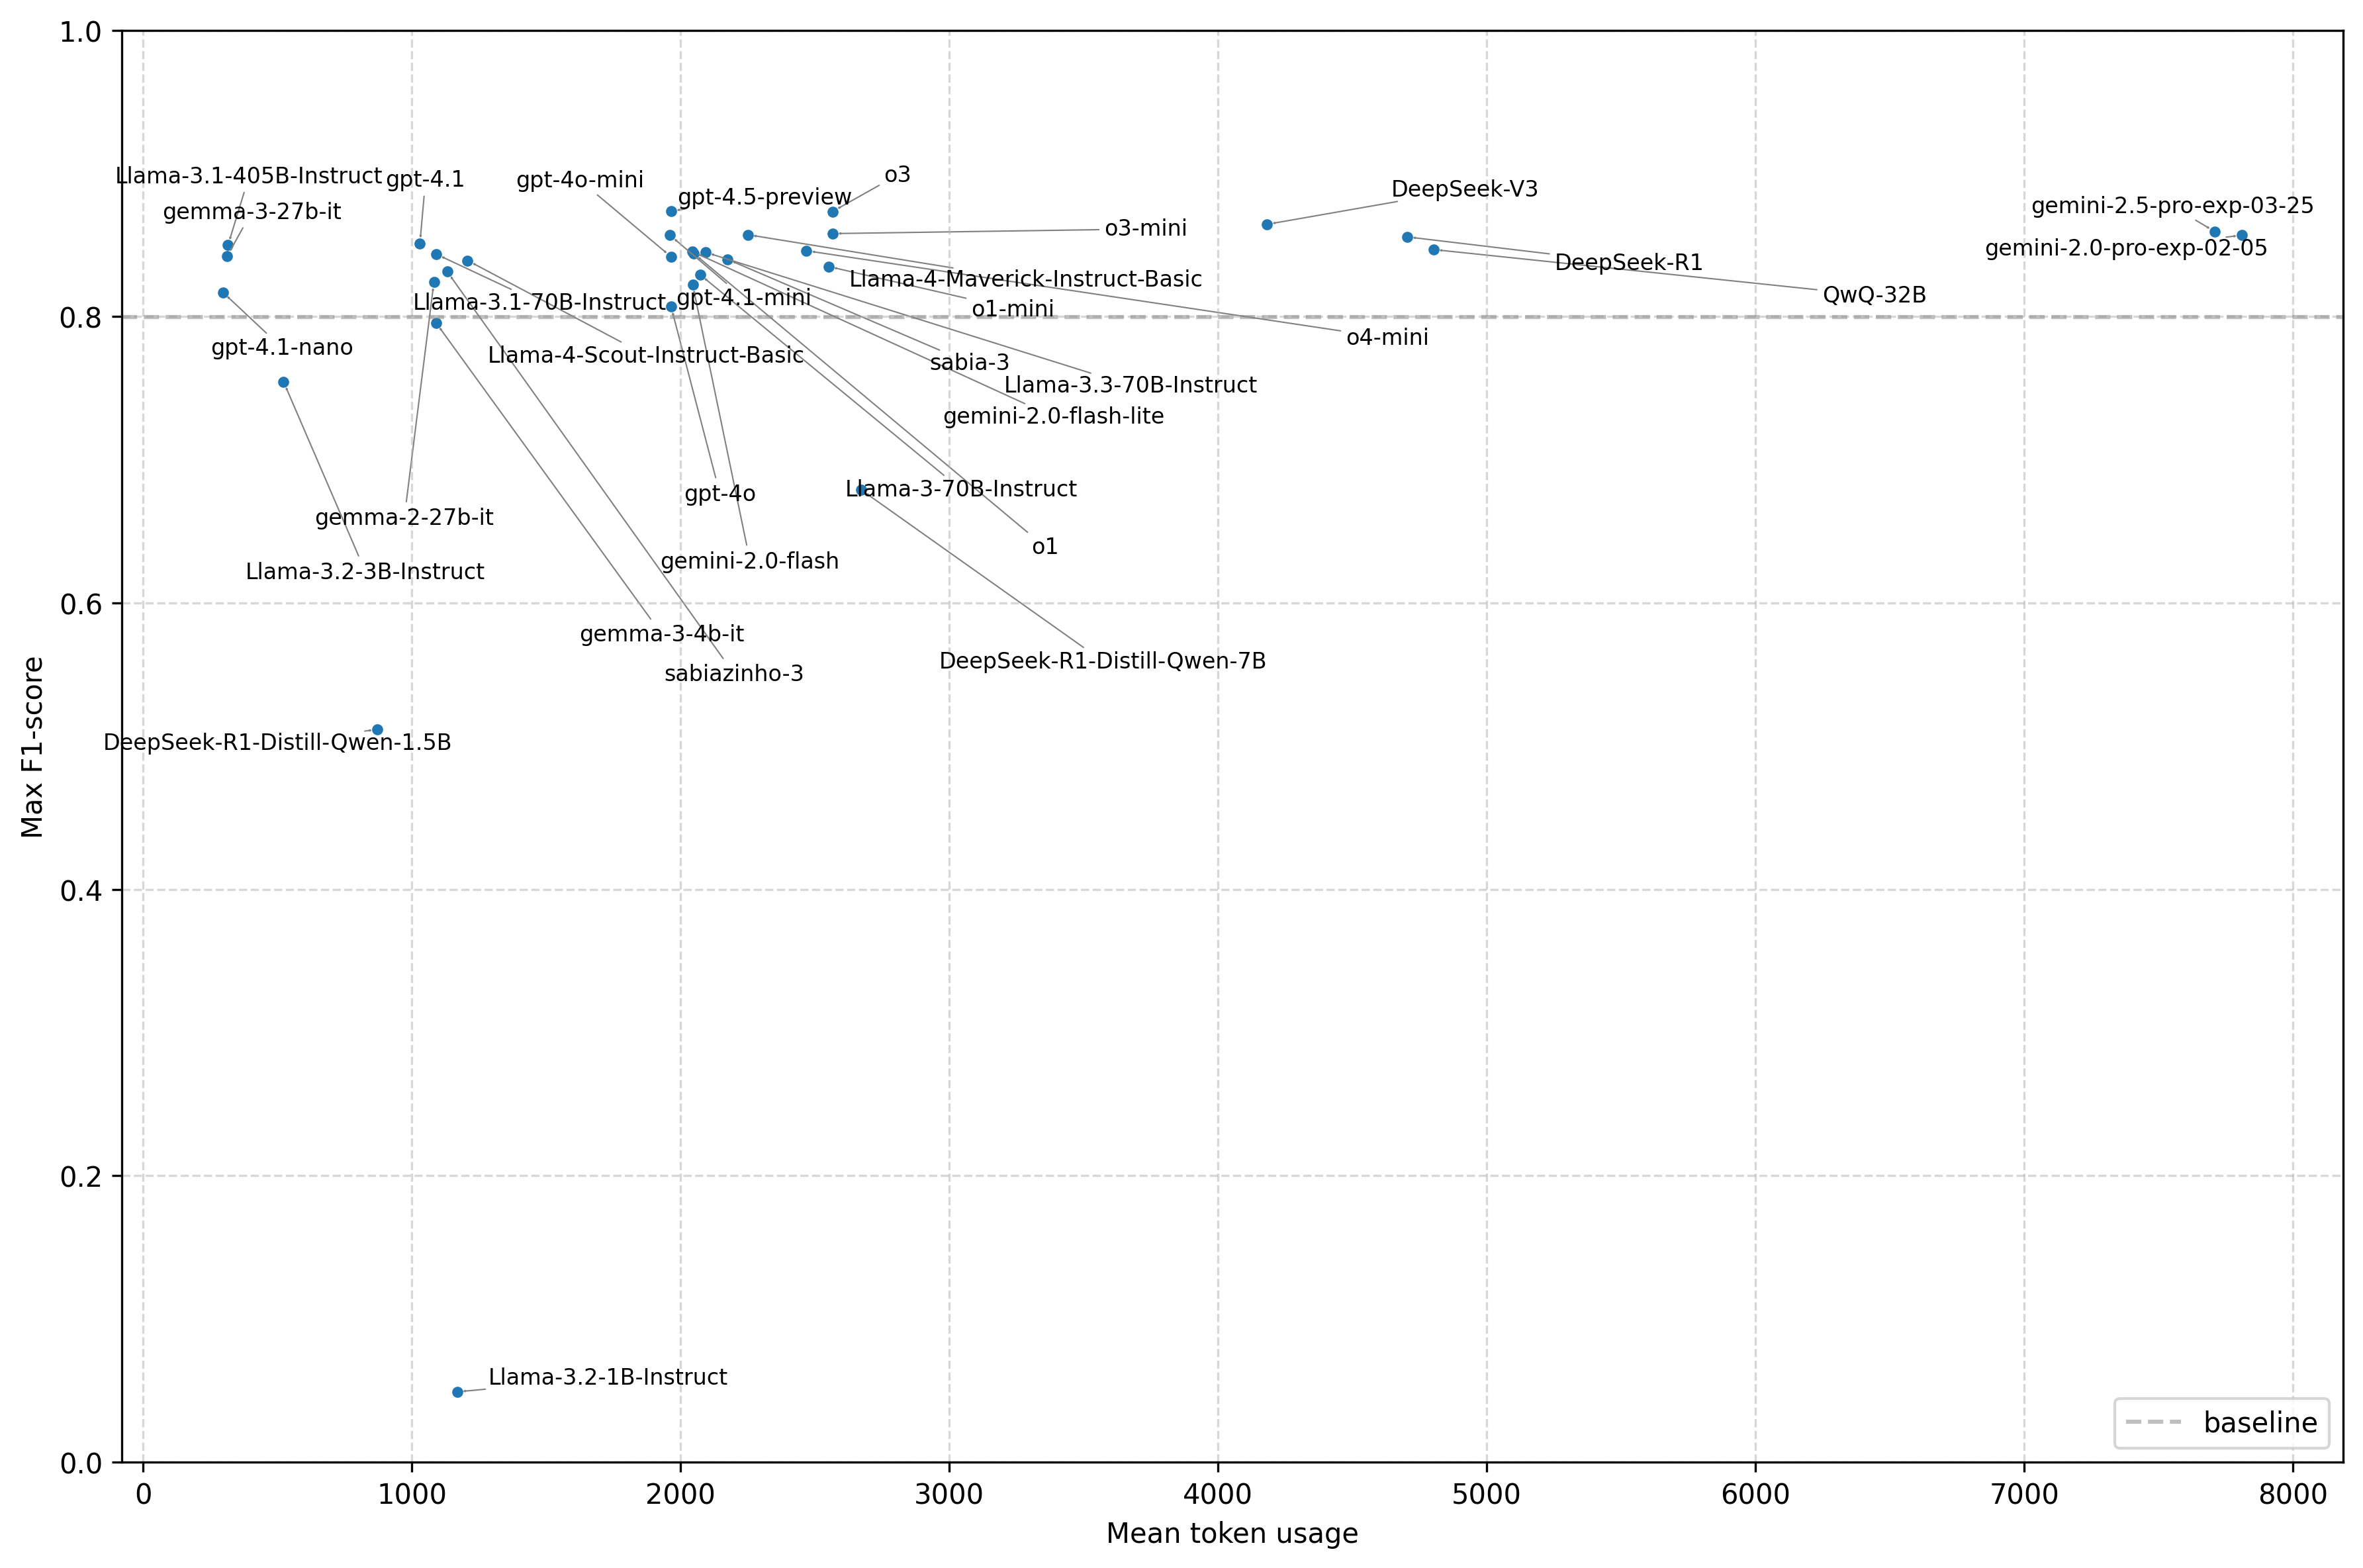

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

def load_data(metrics_path: str, results_path: str):
    """
    Load the computed metrics and LLM token usage results.
    
    Args:
        metrics_path: Path to computed_metrics.csv
        results_path: Path to llms_results.csv
        
    Returns:
        cm: DataFrame with per-model, per-top-k F1 scores
        lr: DataFrame with per-model, per-top-k token usage
    """
    cm = pd.read_csv(metrics_path)
    lr = pd.read_csv(results_path)
    return cm, lr

def summarize_models(cm: pd.DataFrame, lr: pd.DataFrame):
    """
    For each model, find the top_k with the maximum F1 score, then compute
    the average total token usage at that top_k across all queries.
    
    Args:
        cm: DataFrame containing columns ['model', 'top_k', 'f1_score']
        lr: DataFrame containing columns like '{model}-top-{top_k}-total_tokens'
        
    Returns:
        summary: DataFrame with columns ['model', 'top_k_max', 'f1_score_max', 'avg_total_tokens']
    """
    # 1) Find the row index of max F1 score per model
    idx = cm.groupby('model')['f1_score'].idxmax()
    # 2) Extract model, optimal top_k, and max F1
    summary = cm.loc[idx, ['model', 'top_k', 'f1_score']].rename(
        columns={'top_k': 'top_k_max', 'f1_score': 'f1_score_max'}
    ).reset_index(drop=True)
    
    # 3) Compute average token usage for each model at its optimal top_k
    avg_tokens = []
    for _, row in summary.iterrows():
        model = row['model']
        top_k = row['top_k_max']
        col_name = f"{model}-top-{top_k}-total_tokens"
        if col_name in lr.columns:
            avg = lr[col_name].mean()
        else:
            avg = float('nan')
        avg_tokens.append(avg)
    summary['avg_total_tokens'] = avg_tokens
    
    # 4) Drop any models lacking token usage data
    summary = summary.dropna(subset=['avg_total_tokens']).reset_index(drop=True)

    # 5) Filter models of interest
    summary = summary[summary['model'].isin(models)]
    
    return summary

def plot_summary(summary: pd.DataFrame, figsize=(12, 8)):
    """
    Create a scatter plot of average token usage vs. max F1 score, annotating each point
    with the model name and using adjustText to minimize label overlap. Y-axis spans 0 to 1.
    
    Args:
        summary: DataFrame from summarize_models()
        figsize: Tuple specifying figure size
    """
    fig, ax = plt.subplots(figsize=figsize, dpi=300)
    x = summary['avg_total_tokens']
    y = summary['f1_score_max']
    
    # Scatter points
    ax.scatter(x, y, marker='.')
    
    # Prepare annotations
    texts = []
    for _, row in summary.iterrows():
        texts.append(
            ax.text(
                row['avg_total_tokens'], 
                row['f1_score_max'], 
                row['model'], 
                fontsize=8
            )
        )
    
    # Adjust text to avoid overlaps
    adjust_text(
        texts,
        x=x,
        y=y,
        arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
        # expand_text=(3,3),
        # expand_points=(2.0, 2.0),
        force_text=(1,6),
        # force_points=(0.3, 0.3),
        # max_iter=200,
        # expand=(2,2),
        max_move=200,
    )
    
    ax.set_xlabel('Mean token usage')
    ax.set_ylabel('Max F1-score')
    ax.set_ylim(0, 1)  # Force y-axis to span from 0 to 1
    # ax.set_title('Uso médio de tokens vs. F1-score máximo')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.axhline(BASELINE_F1SCORE, color='gray', linestyle='--', alpha=0.5,label="baseline")
    ax.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    fig.savefig('token_usage_vs_f1.png')

# Paths to your CSV files
metrics_csv = 'metrics/computed_metrics.csv'
results_csv = 'data/llms_results.csv'

# Load data
cm, lr = load_data(metrics_csv, results_csv)

# Summarize per-model performance
summary = summarize_models(cm, lr)

# Plot the results
plot_summary(summary)

In [39]:
from scipy.stats import spearmanr

# Calculate spearman correlation and p-value for columns 'A' and 'B'
correlation, p_value = spearmanr(summary['avg_total_tokens'], summary['f1_score_max'])

print(f"Spearman Correlation: {correlation}")
print(f"P-value: {p_value:.6f}")

Spearman Correlation: 0.4933155080213904
P-value: 0.003532


In [40]:
import toml

with open('llms_metadata.toml', 'r') as f:
    config = toml.load(f)

model_prices = {}

for provider in config['models'].keys():
    for model in config['models'][provider].keys():
        if model == 'provider_name': continue
        model_prices[model] = config['models'][provider][model]
model_prices

{'gpt-4o': {'input_price': 2.5,
  'cached_input_price': 1.25,
  'output_price': 10.0,
  'num_params': False,
  'hosting_platform': 'openai',
  'opensource': False,
  'preview': False},
 'gpt-4o-mini': {'input_price': 0.15,
  'cached_input_price': 0.075,
  'output_price': 0.6,
  'num_params': False,
  'hosting_platform': 'openai',
  'opensource': False,
  'preview': False},
 'gpt-4.5-preview': {'input_price': 75.0,
  'cached_input_price': 37.5,
  'output_price': 150.0,
  'num_params': False,
  'hosting_platform': 'openai',
  'opensource': False,
  'preview': True},
 'o1': {'input_price': 15.0,
  'cached_input_price': 7.5,
  'output_price': 60.0,
  'num_params': False,
  'hosting_platform': 'openai',
  'opensource': False,
  'preview': False},
 'o1-mini': {'input_price': 1.1,
  'cached_input_price': 0.55,
  'output_price': 4.4,
  'num_params': False,
  'hosting_platform': 'openai',
  'opensource': False,
  'preview': False},
 'o3-mini': {'input_price': 1.1,
  'cached_input_price': 0.55,


<>:148: SyntaxWarning: invalid escape sequence '\c'
<>:149: SyntaxWarning: invalid escape sequence '\l'
<>:148: SyntaxWarning: invalid escape sequence '\c'
<>:149: SyntaxWarning: invalid escape sequence '\l'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\3695330804.py:148: SyntaxWarning: invalid escape sequence '\c'
  metrics_csv = 'metrics\computed_metrics.csv'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\3695330804.py:149: SyntaxWarning: invalid escape sequence '\l'
  results_csv = 'data\llms_results.csv'


     Unnamed: 0                          model  top_k  \
0            11                gpt-4.5-preview    100   
1           138                             o3    100   
2            86                gpt-4.5-preview    200   
3           135                             o3     10   
4            10                gpt-4.5-preview     50   
..          ...                            ...    ...   
157          97  DeepSeek-R1-Distill-Qwen-1.5B    100   
158         104          Llama-3.2-1B-Instruct     50   
159         105          Llama-3.2-1B-Instruct    100   
160         102          Llama-3.2-1B-Instruct     10   
161         103          Llama-3.2-1B-Instruct     20   

                          model_top_k_name  right_answer_format  \
0                  gpt-4.5-preview-top-100             1.000000   
1                               o3-top-100             1.000000   
2                  gpt-4.5-preview-top-200             1.000000   
3                                o3-top-10     

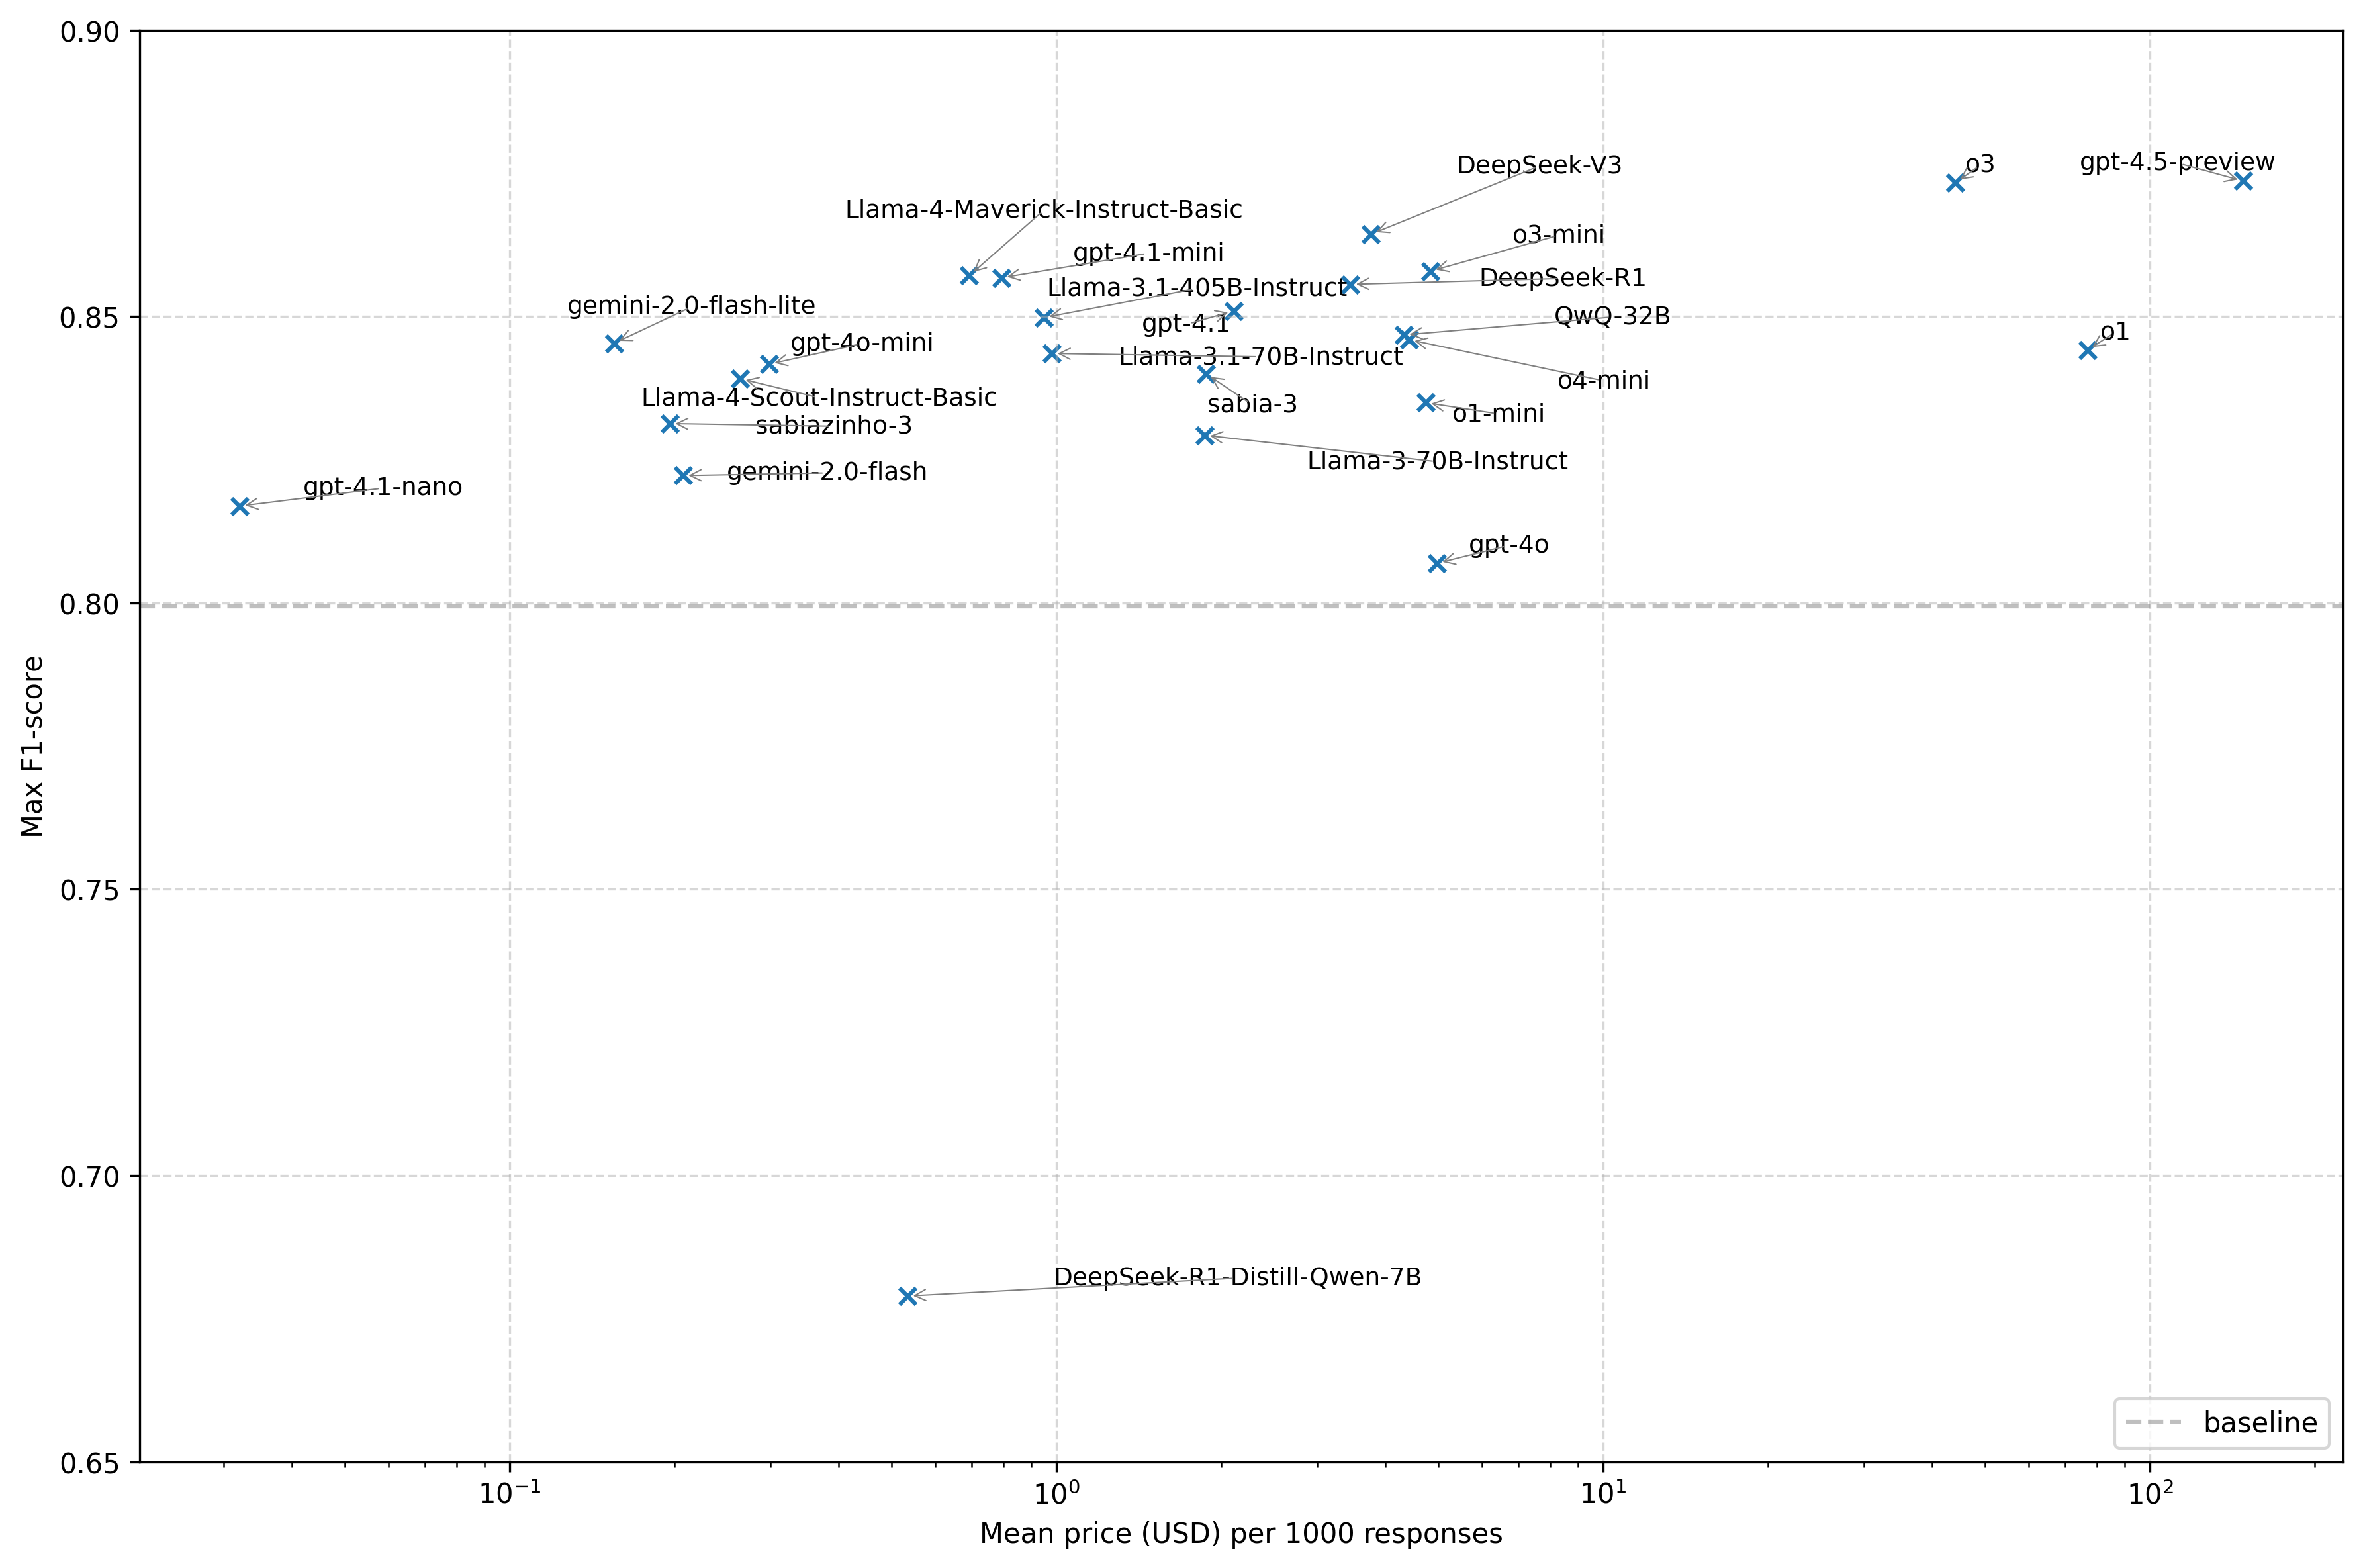

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

def load_data(metrics_path: str, results_path: str):
    """
    Load the computed metrics and LLM token usage results.
    
    Args:
        metrics_path: Path to computed_metrics.csv
        results_path: Path to llms_results.csv
        
    Returns:
        cm: DataFrame with per-model, per-top-k F1 scores
        lr: DataFrame with per-model, per-top-k token usage
    """
    cm = pd.read_csv(metrics_path)
    lr = pd.read_csv(results_path)
    return cm, lr

def summarize_models(cm: pd.DataFrame, lr: pd.DataFrame):
    """
    For each model, find the top_k with the maximum F1 score, then compute
    the average price per response considering the model price and token usage.
    
    Args:
        cm: DataFrame containing columns ['model', 'top_k', 'f1_score']
        lr: DataFrame containing columns like '{model}-top-{top_k}-total_tokens'
        
    Returns:
        summary: DataFrame with columns ['model', 'top_k_max', 'f1_score_max', 'avg_total_tokens']
    """
    print(cm)
    # 1) Find the row index of max F1 score per model
    idx = cm.groupby('model')['f1_score'].idxmax()
    
    # 2) Extract model, optimal top_k, and max F1
    summary = cm.loc[idx, ['model', 'top_k', 'f1_score']].rename(
        columns={'top_k': 'top_k_max', 'f1_score': 'f1_score_max'}
    ).reset_index(drop=True)
    
    # 3) Compute average input token usage for each model at its optimal top_k
    avg_input_tokens = []
    for _, row in summary.iterrows():
        model = row['model']
        top_k = row['top_k_max']
        col_name = f"{model}-top-{top_k}-input_tokens"
        if col_name in lr.columns:
            avg = lr[col_name].mean()
        else:
            avg = float('nan')
        avg_input_tokens.append(avg)
    summary['avg_input_tokens'] = avg_input_tokens
    
    # 4) Compute average input token usage for each model at its optimal top_k
    avg_output_tokens = []
    for _, row in summary.iterrows():
        model = row['model']
        top_k = row['top_k_max']
        col_name = f"{model}-top-{top_k}-output_tokens"
        if col_name in lr.columns:
            avg = lr[col_name].mean()
        else:
            avg = float('nan')
        avg_output_tokens.append(avg)
    summary['avg_output_tokens'] = avg_output_tokens

    # 5) Compute average price per response for each model at its optimal top_k
    avg_price_per_response = []
    for _, row in summary.iterrows():
        model = row['model']
        try:
            avg_input_tks = row['avg_input_tokens']
            avg_output_tks = row['avg_output_tokens']

            if not model_prices[model]['input_price'] or not model_prices[model]['output_price']:
                avg_price_per_response.append(float('nan'))
                continue

            avg_input_price = model_prices[model]['input_price']*10**-6
            avg_output_price = model_prices[model]['output_price']*10**-6
            avg_price_per_response.append((avg_input_price*avg_input_tks + avg_output_price*avg_output_tks)*10**3)
        except:
            avg_price_per_response.append(float('nan'))
    summary['avg_price_per_response'] = avg_price_per_response

    print(summary)
    
    # 4) Drop any models lacking token usage data
    summary = summary.dropna(subset=['avg_price_per_response']).reset_index(drop=True)
    return summary

def plot_summary(summary: pd.DataFrame, figsize=(12, 8)):
    """
    Create a scatter plot of average token usage vs. max F1 score, annotating each point
    with the model name and using adjustText to minimize label overlap. Y-axis spans 0 to 1.
    
    Args:
        summary: DataFrame from summarize_models()
        figsize: Tuple specifying figure size
    """
    fig, ax = plt.subplots(figsize=figsize, dpi=300)
    x = summary['avg_price_per_response']
    y = summary['f1_score_max']
    
    # Scatter points
    ax.scatter(x, y, marker='x')
    ax.set_xscale('log')
    
    # Prepare annotations
    texts = []
    for _, row in summary.iterrows():
        texts.append(
            ax.text(
                row['avg_price_per_response'], 
                row['f1_score_max'], 
                row['model'], 
                fontsize=9
            )
        )
    
    # Adjust text to avoid overlaps
    adjust_text(
        texts,
        x=x,
        y=y,
        arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
        expand_text=(1.5, 2.0),
        expand_points=(1.5, 2.0),
        force_text=(1.0,1.0),
        force_points=(0.3, 0.3),
        max_iter=200,
        expand=(1.5,1.5)
    )
    
    ax.set_xlabel('Mean price (USD) per 1000 responses')
    ax.set_ylabel('Max F1-score')
    ax.set_ylim(0.65, 0.9)  # Force y-axis to span from 0 to 1
    # ax.set_title('Preço médio de 1000 respostas vs. F1-score máximo')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.axhline(BASELINE_F1SCORE, color='gray', linestyle='--', alpha=0.5,label="baseline")
    ax.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    fig.savefig('price_per_response_vs_f1.png')

# Paths to your CSV files
metrics_csv = 'metrics\computed_metrics.csv'
results_csv = 'data\llms_results.csv'

# Load data
cm, lr = load_data(metrics_csv, results_csv)

# Summarize per-model performance
summary = summarize_models(cm, lr)

# Plot the results
plot_summary(summary)

In [42]:
summary

,model,top_k_max,f1_score_max,avg_input_tokens,avg_output_tokens,avg_price_per_response
0,DeepSeek-R1,200,0.855615,4176.354691,527.389016,3.451977
1,DeepSeek-R1-Distill-Qwen-7B,100,0.678955,2166.192220,506.366133,0.534512
2,DeepSeek-V3,200,0.864362,4174.354691,7.668192,3.763821
3,Llama-3-70B-Instruct,100,0.829268,2064.741419,8.045767,1.865508
4,Llama-3.1-405B-Instruct,10,0.849797,308.123570,7.949657,0.948220
5,Llama-3.1-70B-Instruct,50,0.843537,1083.414188,7.977117,0.982252
6,Llama-4-Maverick-Instruct-Basic,100,0.857143,1950.000000,300.304348,0.693268
7,Llama-4-Scout-Instruct-Basic,50,0.839142,1023.025172,184.663616,0.264252
8,QwQ-32B,200,0.846774,4294.180778,507.908467,4.321880
9,gemini-2.0-flash,100,0.822222,2035.196796,10.141876,0.207576


In [43]:
from scipy.stats import spearmanr

# Calculate spearman correlation and p-value for columns 'A' and 'B'
correlation, p_value = spearmanr(summary['avg_price_per_response'], summary['f1_score_max'])

print(f"Spearman Correlation: {correlation}")
print(f"P-value: {p_value:.6f}")

Spearman Correlation: 0.45999999999999996
P-value: 0.023715


<>:131: SyntaxWarning: invalid escape sequence '\c'
<>:132: SyntaxWarning: invalid escape sequence '\l'
<>:131: SyntaxWarning: invalid escape sequence '\c'
<>:132: SyntaxWarning: invalid escape sequence '\l'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\4026808430.py:131: SyntaxWarning: invalid escape sequence '\c'
  metrics_csv = 'metrics\computed_metrics.csv'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\4026808430.py:132: SyntaxWarning: invalid escape sequence '\l'
  results_csv = 'data\llms_results.csv'


     Unnamed: 0                          model  top_k  \
0            11                gpt-4.5-preview    100   
1           138                             o3    100   
2            86                gpt-4.5-preview    200   
3           135                             o3     10   
4            10                gpt-4.5-preview     50   
..          ...                            ...    ...   
157          97  DeepSeek-R1-Distill-Qwen-1.5B    100   
158         104          Llama-3.2-1B-Instruct     50   
159         105          Llama-3.2-1B-Instruct    100   
160         102          Llama-3.2-1B-Instruct     10   
161         103          Llama-3.2-1B-Instruct     20   

                          model_top_k_name  right_answer_format  \
0                  gpt-4.5-preview-top-100             1.000000   
1                               o3-top-100             1.000000   
2                  gpt-4.5-preview-top-200             1.000000   
3                                o3-top-10     

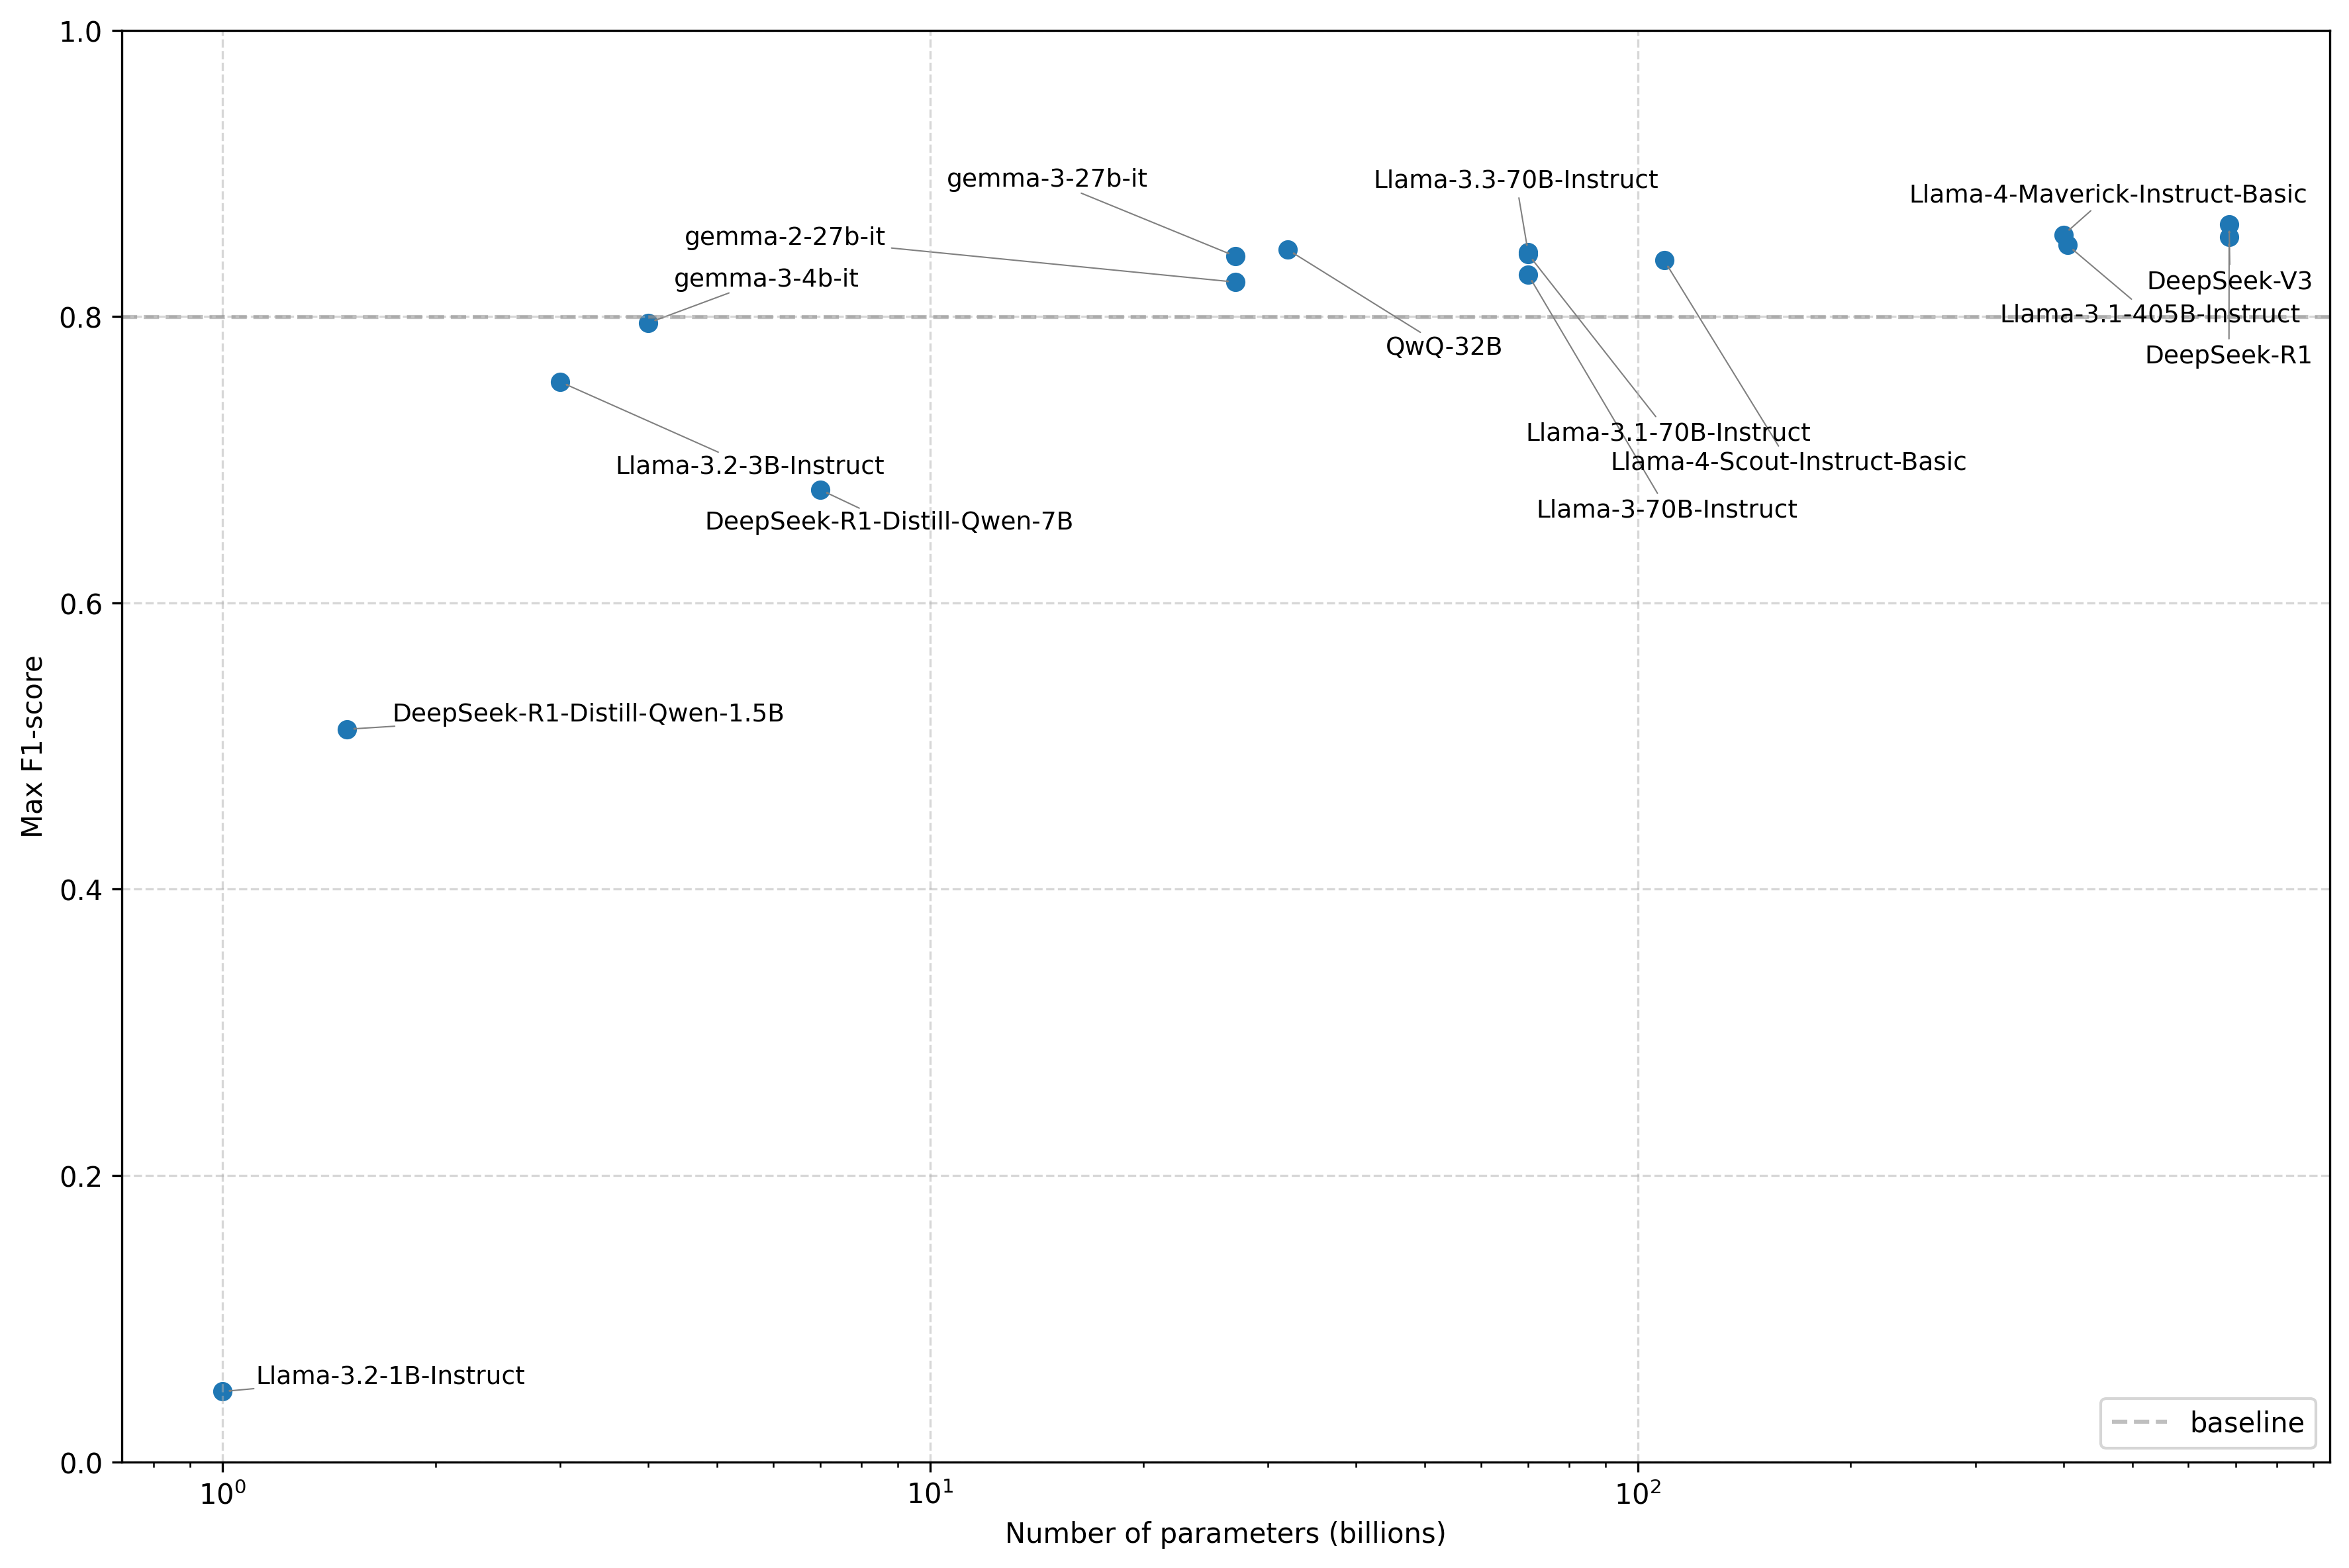

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

import toml

with open('llms_metadata.toml', 'r') as f:
    config = toml.load(f)

model_prices = {}

for provider in config['models'].keys():
    for model in config['models'][provider].keys():
        if model == 'provider_name': continue
        model_prices[model] = config['models'][provider][model]


def load_data(metrics_path: str, results_path: str):
    """
    Load the computed metrics and LLM token usage results.
    
    Args:
        metrics_path: Path to computed_metrics.csv
        results_path: Path to llms_results.csv
        
    Returns:
        cm: DataFrame with per-model, per-top-k F1 scores
        lr: DataFrame with per-model, per-top-k token usage
    """
    cm = pd.read_csv(metrics_path)
    lr = pd.read_csv(results_path)
    return cm, lr

def summarize_models(cm: pd.DataFrame, lr: pd.DataFrame):
    """
    For each model, find the top_k with the maximum F1 score, then compute
    the average price per response considering the model price and token usage.
    
    Args:
        cm: DataFrame containing columns ['model', 'top_k', 'f1_score']
        lr: DataFrame containing columns like '{model}-top-{top_k}-total_tokens'
        
    Returns:
        summary: DataFrame with columns ['model', 'top_k_max', 'f1_score_max', 'avg_total_tokens']
    """
    print(cm)
    # 1) Find the row index of max F1 score per model
    idx = cm.groupby('model')['f1_score'].idxmax()
    
    # 2) Extract model, optimal top_k, and max F1
    summary = cm.loc[idx, ['model', 'top_k', 'f1_score']].rename(
        columns={'top_k': 'top_k_max', 'f1_score': 'f1_score_max'}
    ).reset_index(drop=True)

    # filter models of interest
    summary = summary[summary['model'].isin(models)]

    # 3) Extract model's number of parameters
    n_params = []
    for _, row in summary.iterrows():
        model = row['model']
        model_n_params = model_prices[model]['num_params']
        if model_n_params:
            n_params.append(model_n_params)
        else: 
            n_params.append(None)
    summary['n_params'] = n_params

    print(summary)
    
    # 4) Drop any models lacking token usage data
    summary = summary.dropna(subset=['n_params']).reset_index(drop=True)
    return summary

def plot_summary(summary: pd.DataFrame, figsize=(12, 8)):
    """
    Create a scatter plot of average token usage vs. max F1 score, annotating each point
    with the model name and using adjustText to minimize label overlap. Y-axis spans 0 to 1.
    
    Args:
        summary: DataFrame from summarize_models()
        figsize: Tuple specifying figure size
    """
    fig, ax = plt.subplots(figsize=figsize, dpi=300)
    x = summary['n_params']
    y = summary['f1_score_max']
    
    # Scatter points
    ax.scatter(x, y, marker='o')
    ax.set_xscale('log')
    
    # Prepare annotations
    texts = []
    for _, row in summary.iterrows():
        texts.append(
            ax.text(
                row['n_params'], 
                row['f1_score_max'], 
                row['model'], 
                fontsize=9
            )
        )
    
    # Adjust text to avoid overlaps
    adjust_text(
        texts,
        x=x,
        y=y,
        arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
        # expand_text=(3,3),
        # expand_points=(2.0, 2.0),
        force_text=(1,6),
        # force_points=(0.3, 0.3),
        # max_iter=200,
        # expand=(2,2),
        max_move=200,
    )
    
    ax.set_xlabel('Number of parameters (billions)')
    ax.set_ylabel('Max F1-score')
    ax.set_ylim(0.0, 1.0)  # Force y-axis to span from 0 to 1
    # ax.set_title('Preço médio de 1000 respostas vs. F1-score máximo')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.axhline(BASELINE_F1SCORE, color='gray', linestyle='--', alpha=0.5,label="baseline")
    ax.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    fig.savefig('n_params_vs_f1.png')

# Paths to your CSV files
metrics_csv = 'metrics\computed_metrics.csv'
results_csv = 'data\llms_results.csv'

# Load data
cm, lr = load_data(metrics_csv, results_csv)

# Summarize per-model performance
summary = summarize_models(cm, lr)

# Plot the results
plot_summary(summary)

In [45]:
summary.to_csv('n_params_vs_f1.csv', index=False)

In [46]:
# Correlation between number of parameters and max F1 score

summary[['n_params', 'f1_score_max']].corr(method='spearman')

,n_params,f1_score_max
n_params,1.000000,0.908428
f1_score_max,0.908428,1.000000


In [47]:
summary[summary['n_params']<=30][['n_params', 'f1_score_max']].corr(method='spearman')

,n_params,f1_score_max
n_params,1.000000,0.882919
f1_score_max,0.882919,1.000000


In [48]:
summary[summary['n_params']>30][['n_params', 'f1_score_max']].corr(method='spearman')

,n_params,f1_score_max
n_params,1.000000,0.681005
f1_score_max,0.681005,1.000000


In [49]:
from scipy.stats import spearmanr

# Calculate spearman correlation and p-value for columns 'A' and 'B'
correlation, p_value = spearmanr(summary['n_params'], summary['f1_score_max'])

print(f"Spearman Correlation: {correlation}")
print(f"P-value: {p_value:.6f}")

Spearman Correlation: 0.908428417027823
P-value: 0.000001


In [50]:
from scipy.stats import spearmanr

filtered_summary = summary[summary['n_params'] <= 30]

# Calculate spearman correlation and p-value for columns 'A' and 'B'
correlation, p_value = spearmanr(filtered_summary['n_params'], filtered_summary['f1_score_max'])

print(f"Spearman Correlation: {correlation}")
print(f"P-value: {p_value:.6f}")

Spearman Correlation: 0.8829187134416479
P-value: 0.008450


In [51]:
from scipy.stats import spearmanr

filtered_summary = summary[summary['n_params'] > 30]

# Calculate spearman correlation and p-value for columns 'A' and 'B'
correlation, p_value = spearmanr(filtered_summary['n_params'], filtered_summary['f1_score_max'])

print(f"Spearman Correlation: {correlation}")
print(f"P-value: {p_value:.6f}")

Spearman Correlation: 0.681005224606999
P-value: 0.043434


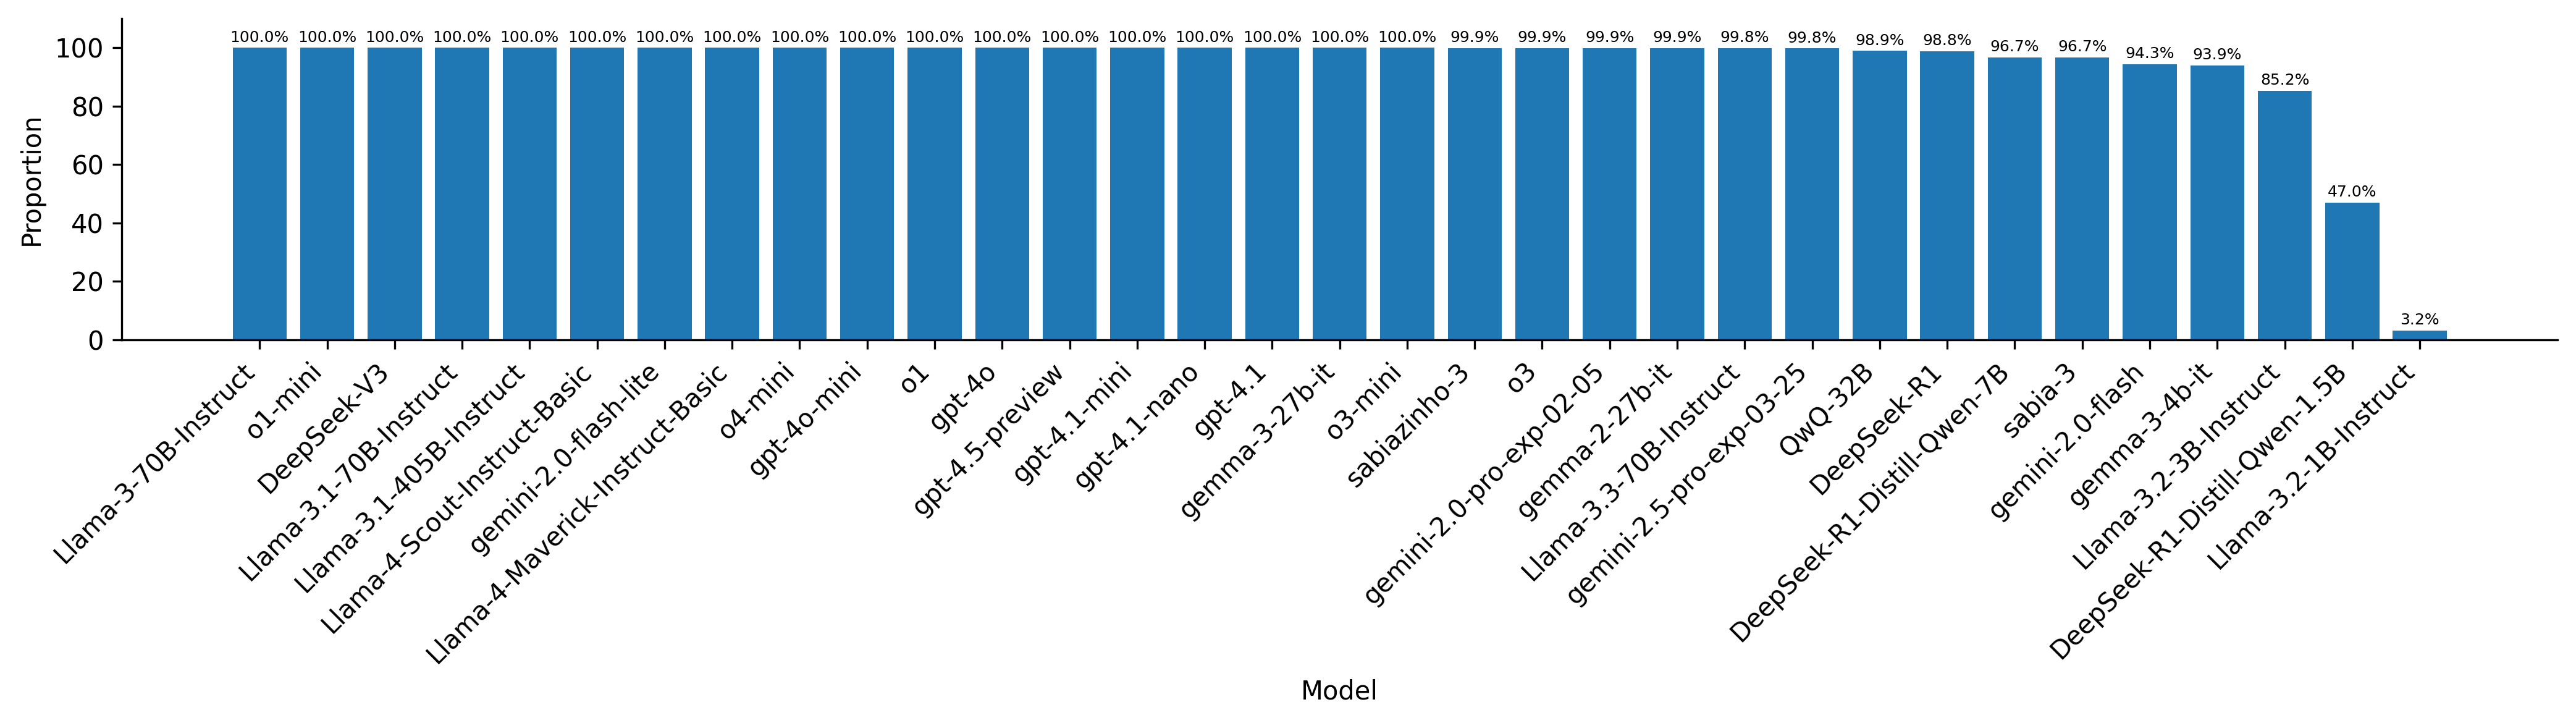

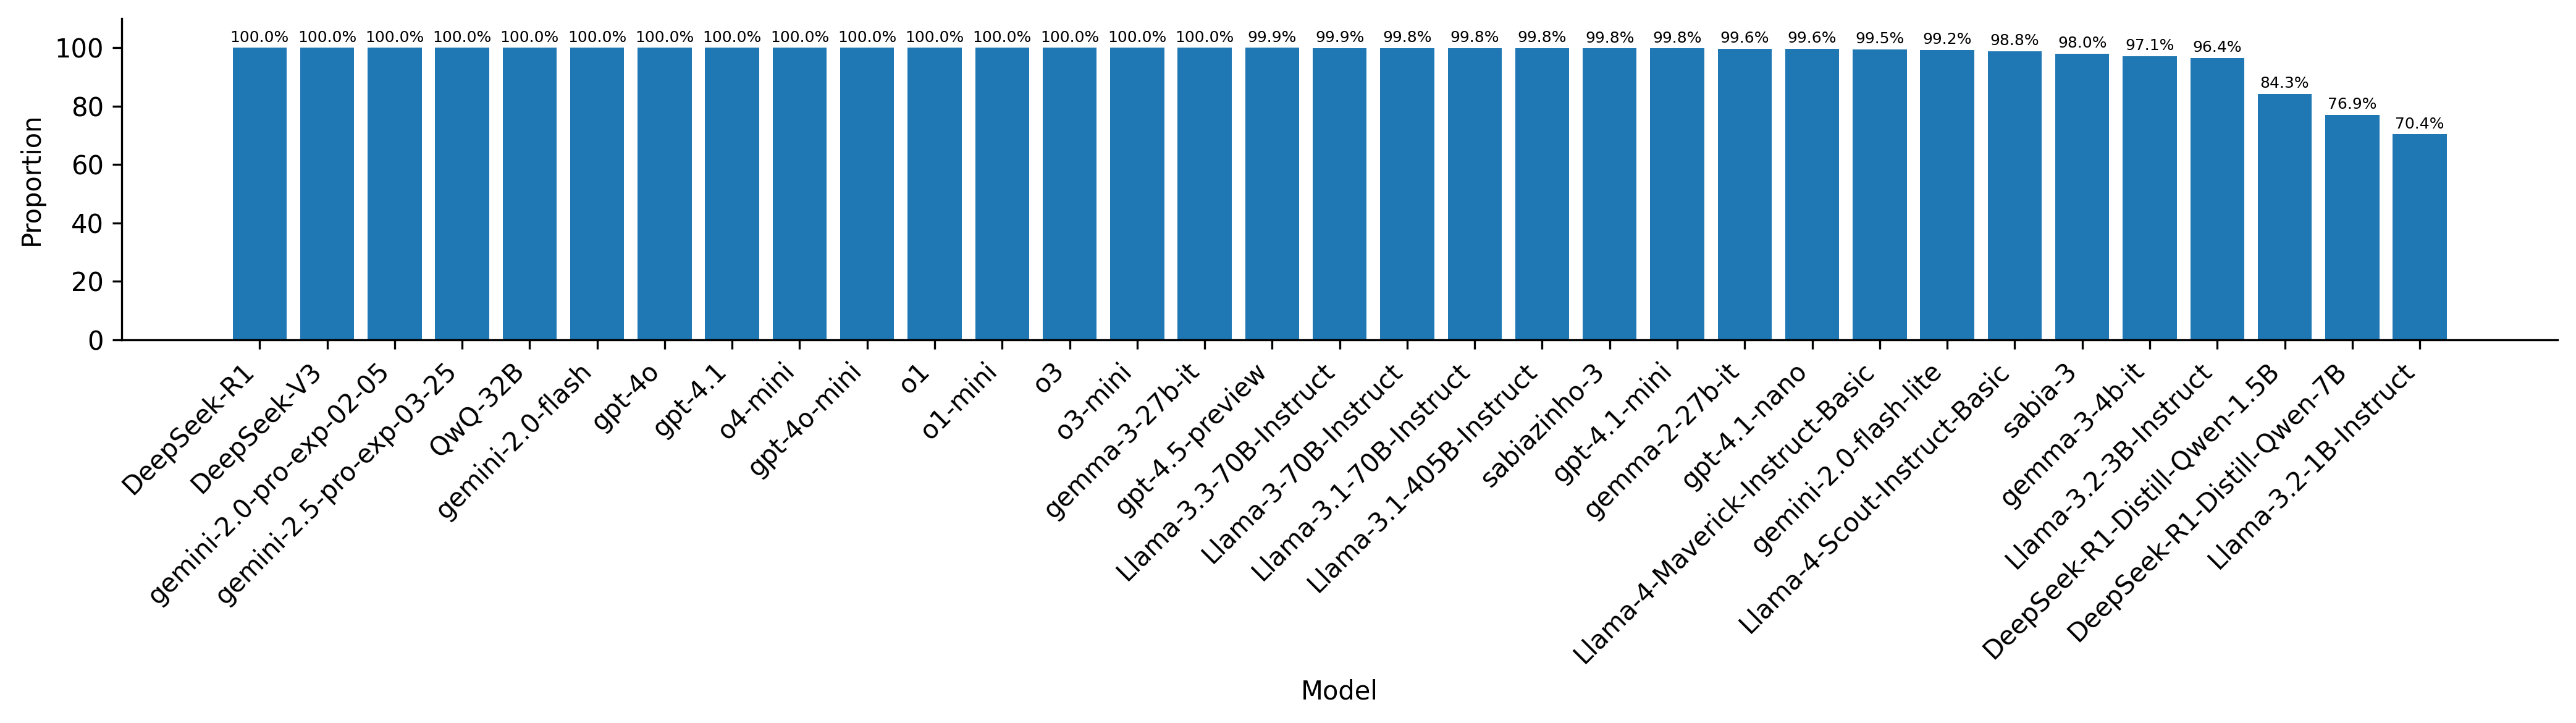

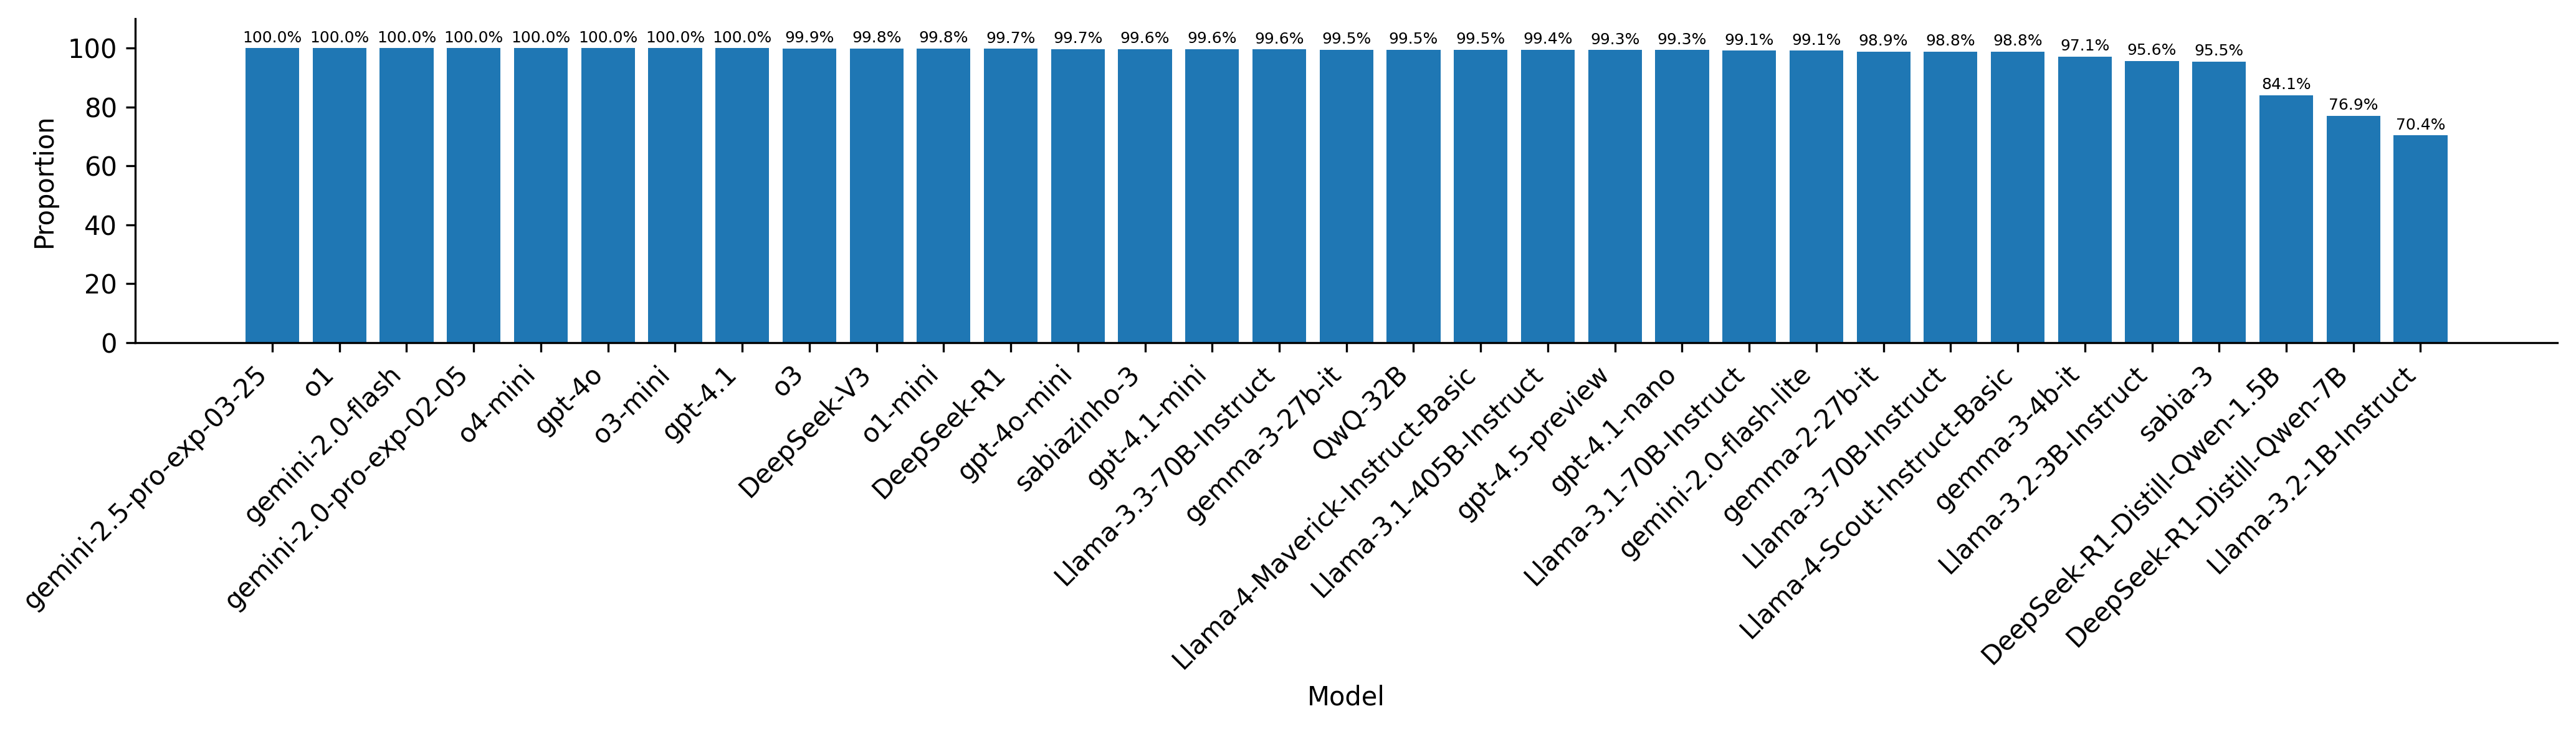

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the computed metrics
cm = pd.read_csv('metrics/computed_metrics.csv')

cm = cm[cm['model'].isin(models)]

# Define metrics to plot
metrics = [
    ('right_answer_format', 'Proporção de respostas dentro do formato solicitado por modelo (%)'),
    ('valid_icpc_2_code_rate', 'Proporção de respostas com código CIAP-2 válido por modelo (%)'),
    ('selected_code_is_in_search_results', 'Proporção de respostas com código selecionado entre os resultados por modelo (%)')
]

# Generate wide, short bar charts with percentage annotations and no top/right spines
for metric, title in metrics:
    means = cm.groupby('model')[metric].mean().sort_values(ascending=False)
    fig, ax = plt.subplots(figsize=(14, 4), dpi=300)
    bars = ax.bar(means.index, means.values * 100)
    # Annotate each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f"{height:.1f}%",
            ha='center',
            va='bottom',
            fontsize=6
        )
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Set labels and title
    # ax.set_title(title, pad=15)
    ax.set_xlabel('Model')
    ax.set_ylabel('Proportion')
    ax.set_ylim(0, 110)
    ax.set_xticks(range(len(means.index)))
    ax.set_xticklabels(means.index, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    fig.savefig(f'{metric}_per_model.png')


In [53]:
cm, lr = load_data(metrics_csv, results_csv)


In [54]:
cm

,Unnamed: 0,model,top_k,model_top_k_name,right_answer_format,valid_icpc_2_code_rate,relevant_code_is_in_search_results,selected_code_is_in_search_results,selected_code_is_in_relevant_codes,selected_code_is_in_relevant_codes_and_in_search_results,precision,recall,f1_score,ideal_scn_precision,ideal_scn_recall,ideal_scn_f1_score
0,11,gpt-4.5-preview,100,gpt-4.5-preview-top-100,1.000000,1.000000,0.859770,0.992481,0.747126,0.863636,0.814536,0.942029,0.873656,0.835476,0.942029,0.885559
1,138,o3,100,o3-top-100,1.000000,1.000000,0.859770,0.997590,0.760920,0.885027,0.797590,0.965015,0.873351,0.821340,0.965015,0.887399
2,86,gpt-4.5-preview,200,gpt-4.5-preview-top-200,1.000000,0.997494,0.868966,0.992481,0.744828,0.851852,0.812030,0.939130,0.870968,0.828645,0.939130,0.880435
3,135,o3,10,o3-top-10,1.000000,1.000000,0.827586,1.000000,0.749425,0.905556,0.812968,0.934097,0.869333,0.853403,0.934097,0.891929
4,10,gpt-4.5-preview,50,gpt-4.5-preview-top-50,1.000000,1.000000,0.848276,0.992519,0.742529,0.869919,0.805486,0.938953,0.867114,0.830334,0.938953,0.881310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,97,DeepSeek-R1-Distill-Qwen-1.5B,100,DeepSeek-R1-Distill-Qwen-1.5B-top-100,0.158621,0.760870,0.859770,0.760870,0.064368,0.074866,0.608696,0.073298,0.130841,0.636364,0.073298,0.131455
158,104,Llama-3.2-1B-Instruct,50,Llama-3.2-1B-Instruct-top-50,0.045977,0.888889,0.848276,0.888889,0.022989,0.027100,0.555556,0.025707,0.049140,0.588235,0.025707,0.049261
159,105,Llama-3.2-1B-Instruct,100,Llama-3.2-1B-Instruct-top-100,0.062069,0.925926,0.859770,0.925926,0.018391,0.021390,0.296296,0.020833,0.038929,0.320000,0.020833,0.039120
160,102,Llama-3.2-1B-Instruct,10,Llama-3.2-1B-Instruct-top-10,0.011494,0.500000,0.827586,0.500000,0.002299,0.002778,0.250000,0.002545,0.005038,0.250000,0.002545,0.005038


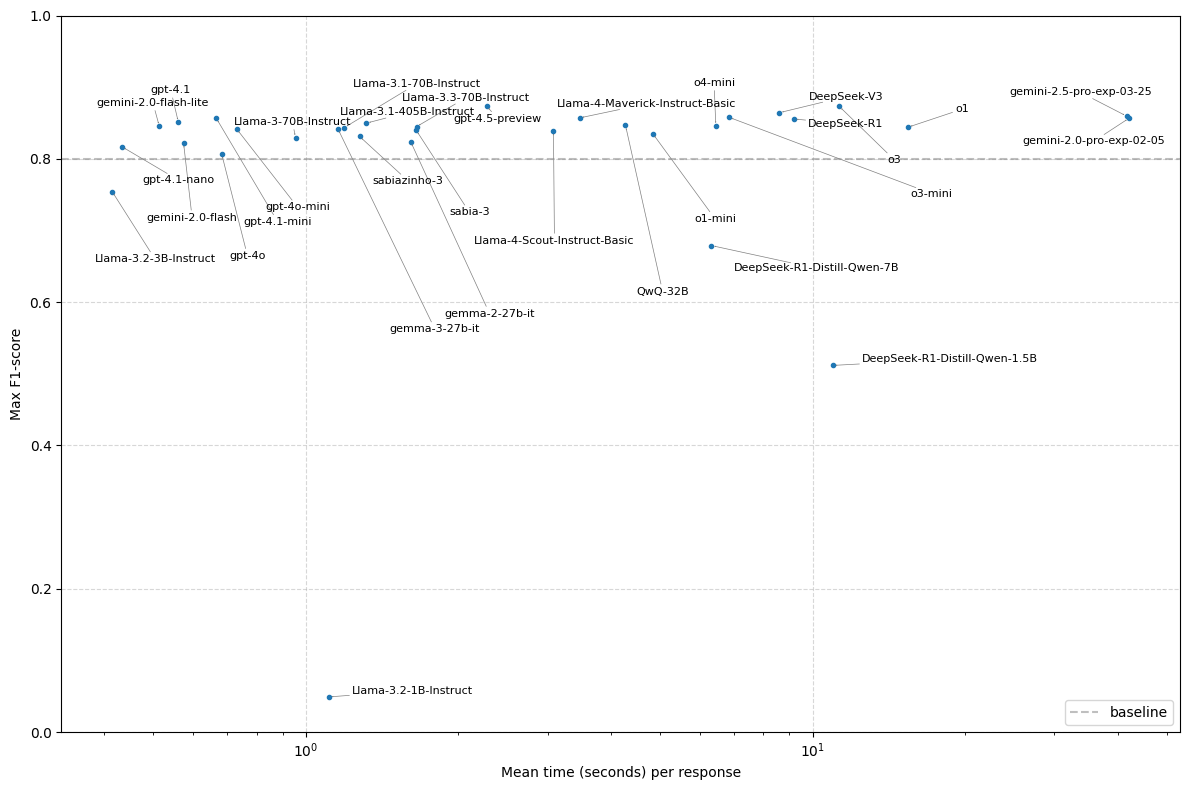

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

def load_data(metrics_path: str, results_path: str):
    """
    Load the computed metrics and LLM token usage results.
    
    Args:
        metrics_path: Path to computed_metrics.csv
        results_path: Path to llms_results.csv
        
    Returns:
        cm: DataFrame with per-model, per-top-k F1 scores
        lr: DataFrame with per-model, per-top-k token usage
    """
    cm = pd.read_csv(metrics_path)
    lr = pd.read_csv(results_path)
    return cm, lr

def summarize_models(cm: pd.DataFrame, lr: pd.DataFrame):
    """
    For each model, find the top_k with the maximum F1 score, then compute
    the average price per response considering the model price and token usage.
    
    Args:
        cm: DataFrame containing columns ['model', 'top_k', 'f1_score']
        lr: DataFrame containing columns like '{model}-top-{top_k}-total_tokens'
        
    Returns:
        summary: DataFrame with columns ['model', 'top_k_max', 'f1_score_max', 'avg_total_tokens']
    """
    # 1) Find the row index of max F1 score per model
    idx = cm.groupby('model')['f1_score'].idxmax()
    
    # 2) Extract model, optimal top_k, and max F1
    summary = cm.loc[idx, ['model', 'top_k', 'f1_score']].rename(
        columns={'top_k': 'top_k_max', 'f1_score': 'f1_score_max'}
    ).reset_index(drop=True)

    # 3) Compute average time to response for each model at its optimal top_k
    avg_time_per_response = []
    for _, row in summary.iterrows():
        model = row['model']
        top_k = row['top_k_max']
        col_name = f"{model}-top-{top_k}-timedelta"
        if col_name in lr.columns:
            try:
                if type(lr[col_name].iloc[0])!=str:
                    avg = lr[col_name].mean()
                else:
                    avg = pd.to_timedelta(lr[col_name]).dropna().mean().total_seconds()
            except:
                avg = float('nan')
        else:
            avg = float('nan')
        avg_time_per_response.append(avg)
    summary['avg_time_per_response'] = avg_time_per_response
    
    # 4) Drop any models lacking token usage data
    summary = summary.dropna(subset=['avg_time_per_response']).reset_index(drop=True)

    summary = summary[summary['model'].isin(models)]
    return summary

def plot_summary(summary: pd.DataFrame, figsize=(12, 8)):
    """
    Create a scatter plot of average token usage vs. max F1 score, annotating each point
    with the model name and using adjustText to minimize label overlap. Y-axis spans 0 to 1.
    
    Args:
        summary: DataFrame from summarize_models()
        figsize: Tuple specifying figure size
    """
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    x = summary['avg_time_per_response']
    y = summary['f1_score_max']
    
    # Scatter points
    ax.scatter(x, y, marker='.')
    ax.set_xscale('log')
    
    # Prepare annotations
    texts = []
    for _, row in summary.iterrows():
        texts.append(
            ax.text(
                row['avg_time_per_response'], 
                row['f1_score_max'], 
                row['model'], 
                fontsize=8
            )
        )
    
    # Adjust text to avoid overlaps
    adjust_text(
        texts,
        x=x,
        y=y,
        arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
        # expand_text=(3,3),
        # expand_points=(2.0, 2.0),
        force_text=(1,6),
        # force_points=(0.3, 0.3),
        # max_iter=200,
        # expand=(2,2),
        max_move=200,
    )
    
    ax.set_xlabel('Mean time (seconds) per response')
    ax.set_ylabel('Max F1-score')
    ax.set_ylim(0.0, 1.0)  # Force y-axis to span from 0 to 1
    # ax.set_title('Tempo médio por resposta vs. F1-score máximo')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.axhline(BASELINE_F1SCORE, color='gray', linestyle='--', alpha=0.5,label="baseline")
    ax.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    fig.savefig('timedelta_per_response_vs_f1.png')

# Paths to your CSV files
metrics_csv = 'metrics/computed_metrics.csv'
results_csv = 'data/llms_results.csv'

# Load data
cm, lr = load_data(metrics_csv, results_csv)

# Summarize per-model performance
summary = summarize_models(cm, lr)

# Plot the results
plot_summary(summary)

In [56]:
from scipy.stats import spearmanr

# Calculate spearman correlation and p-value for columns 'A' and 'B'
correlation, p_value = spearmanr(summary['avg_time_per_response'], summary['f1_score_max'])

print(f"Spearman Correlation: {correlation}")
print(f"P-value: {p_value:.6f}")

Spearman Correlation: 0.4321847507331378
P-value: 0.013503


In [57]:
summary

,model,top_k_max,f1_score_max,avg_time_per_response
0,DeepSeek-R1,200,0.855615,9.188371
1,DeepSeek-R1-Distill-Qwen-1.5B,10,0.511712,10.960516
2,DeepSeek-R1-Distill-Qwen-7B,100,0.678955,6.315442
3,DeepSeek-V3,200,0.864362,8.596956
4,Llama-3-70B-Instruct,100,0.829268,0.954147
5,Llama-3.1-405B-Instruct,10,0.849797,1.316253
6,Llama-3.1-70B-Instruct,50,0.843537,1.190610
7,Llama-3.2-1B-Instruct,50,0.049140,1.110342
8,Llama-3.2-3B-Instruct,20,0.754386,0.414643
9,Llama-3.3-70B-Instruct,100,0.844875,1.653314


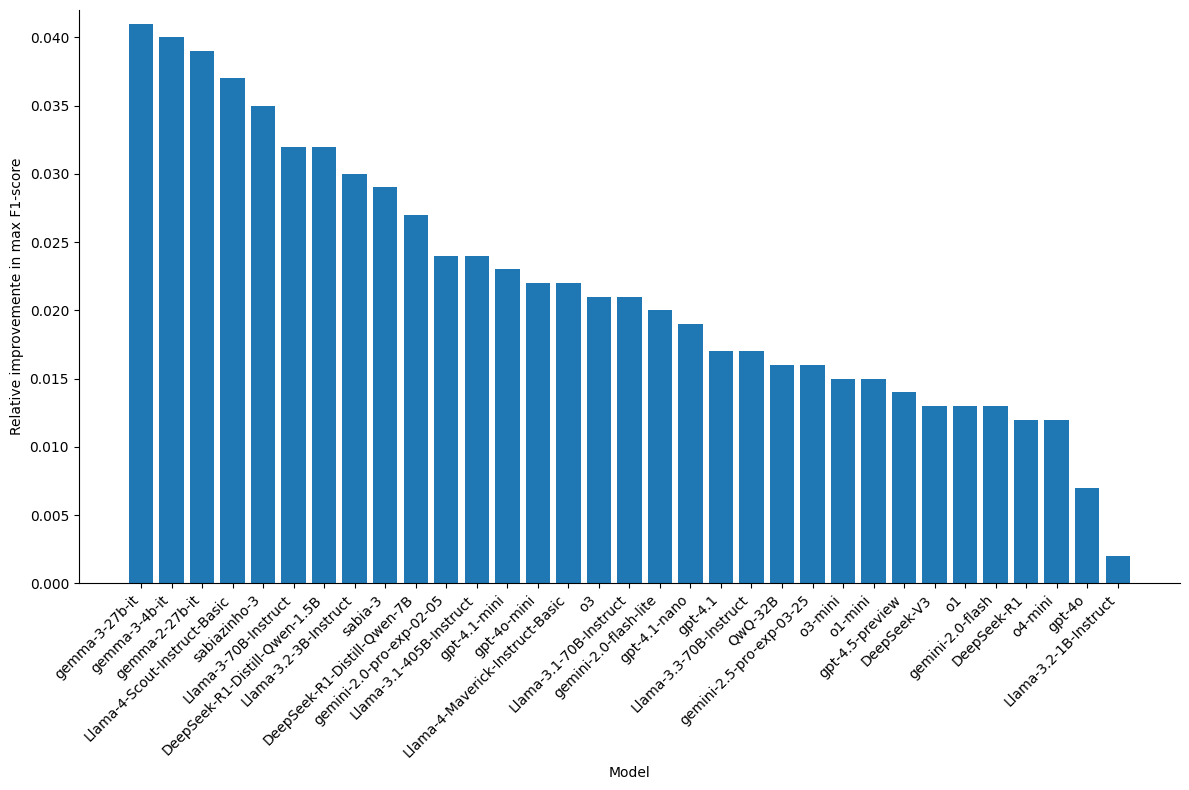

In [58]:
filtered_summ_piv_df = summ_piv_df.loc[models]
filtered_summ_ideal_piv_df = summ_ideal_piv_df.loc[models]

merged_piv_df = pd.merge(filtered_summ_piv_df, filtered_summ_ideal_piv_df, on='Model').drop_duplicates()
merged_piv_df['Difference'] = round((merged_piv_df['Max ideal F1 score'] - merged_piv_df['Max F1 score'])/merged_piv_df['Max F1 score'], 3)
merged_piv_df = merged_piv_df.sort_values(by='Difference', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
ax.bar(merged_piv_df.index, height = merged_piv_df['Difference'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set labels and title
title = 'Porcentagem de melhora do desempenho de cada modelo com um buscador ideal'
# ax.set_title(title, pad=15)
ax.set_xlabel('Model')
ax.set_ylabel('Relative improvemente in max F1-score')
ax.set_ylim(0, 0.042)
ax.set_xticks(range(len(merged_piv_df.index)))
ax.set_xticklabels(merged_piv_df.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()
fig.savefig('diff_per_model.png')

In [59]:
summ_ideal_piv_df

,Mean ideal F1 score,Max ideal F1 score
Model,,
o3,0.882119,0.891929
gpt-4.5-preview,0.879253,0.885559
gemini-2.0-pro-exp-02-05,0.867294,0.877579
gpt-4.1-mini,0.873395,0.876560
gemma-3-27b-it,0.857486,0.876404
DeepSeek-V3,0.867367,0.876011
Llama-4-Maverick-Instruct-Basic,0.865504,0.875676
gemini-2.5-pro-exp-03-25,0.868843,0.873315
o3-mini,0.863928,0.870879


In [60]:
summ_piv_df

,Mean F1 score,Max F1 score
Model,,
gpt-4.5-preview,0.865513,0.873656
o3,0.862998,0.873351
DeepSeek-V3,0.854453,0.864362
gemini-2.5-pro-exp-03-25,0.851347,0.859416
o3-mini,0.850513,0.857916
Llama-4-Maverick-Instruct-Basic,0.843506,0.857143
gpt-4.1-mini,0.852646,0.856764
gemini-2.0-pro-exp-02-05,0.848887,0.856764
DeepSeek-R1,0.842521,0.855615


In [61]:
lr['DeepSeek-R1-top-10'].iloc[0]

'<think>\nOkay, let\'s tackle this query. The user is asking for the ICPC code corresponding to "síndrome de Cockett". The search results provided include several entries with similar-sounding names.\n\nFirst, I need to check the exact spelling. The query is "Cockett", and the first result is "Síndrome de Cocket" with code K99. The spelling here is "Cocket" with one \'t\', while the query has two \'t\'s. That\'s a close match but not exact. However, in medical terminology, slight variations in spelling can sometimes be due to transliteration or common misspellings. I should consider if "Cocket" is a recognized variant.\n\nLooking at the other results: "Corlett" (S84), "Cavare" (N99), "Cogan" (F73), etc. None of these seem to match "Cockett" as closely as the first result. The rest are either different syndromes or have different code letters. Since the first option is the closest in spelling and the code K99 is listed for "Cocket", I need to verify if "Cockett syndrome" is another name

In [62]:
lr['DeepSeek-R1-top-100'].iloc[0]

'<think>\nOkay, let\'s tackle this query. The user is asking for the ICPC code corresponding to "síndrome de Cockett". First, I need to check the search results provided to find the best match.\n\nLooking through the list, the first result is code K99 with the expression "Síndrome de Cocket". The spelling here is slightly different—Cocket instead of Cockett. The user\'s query has an extra \'t\', but in medical terminology, such minor spelling variations can occur due to transliteration or typos. \n\nNext, I should consider if there are any other entries that might be a closer match. Scanning the rest of the results, there\'s a code S83 for "Síndrome de doença congênita de Weber-Cockayne". While that includes "Cockayne", which is similar to Cockett, the full name of the syndrome is different. Weber-Cockayne syndrome is a specific condition related to epidermolysis bullosa, which might not align with Cockett syndrome. \n\nOther entries like "Síndrome de Corlett" (S84) or "síndrome de Cav

In [63]:
import pandas as pd

llms_preds_df = pd.read_csv('metrics\predictions_data.csv', index_col=0)


sample = llms_preds_df[(
    (llms_preds_df['model']=='Llama-3.2-1B-Instruct')
    &
    (llms_preds_df['selected_code_is_in_relevant_codes']==False)
    &
    (llms_preds_df['top_k']==20)
    )].sample(1)

print(sample['model'], sample['top_k'], sample['query'], sample['selected_code'], 'Is it correct?', sample['selected_code_is_in_relevant_codes'], sep='\n')
print(sample['prediction'].iloc[0])

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\3666028836.py:3: SyntaxWarning: invalid escape sequence '\p'
  llms_preds_df = pd.read_csv('metrics\predictions_data.csv', index_col=0)


224    Llama-3.2-1B-Instruct
Name: model, dtype: object
224    20
Name: top_k, dtype: int64
224    nodulação
Name: query, dtype: object
224    NaN
Name: selected_code, dtype: object
Is it correct?
224    False
Name: selected_code_is_in_relevant_codes, dtype: bool
<p>answer selected_code="S04"></answer>


In [64]:
import pandas as pd

llms_results_df = pd.read_csv('data\llms_results.csv', index_col=0)
llms_results_df.columns

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\583300778.py:3: SyntaxWarning: invalid escape sequence '\l'
  llms_results_df = pd.read_csv('data\llms_results.csv', index_col=0)


Index(['gpt-4o-mini-top-10', 'gpt-4o-mini-top-10-timedelta',
       'gpt-4o-mini-top-10-response-metadata', 'gpt-4o-mini-top-20',
       'gpt-4o-mini-top-20-timedelta', 'gpt-4o-mini-top-20-response-metadata',
       'gpt-4o-mini-top-50', 'gpt-4o-mini-top-50-timedelta',
       'gpt-4o-mini-top-50-response-metadata', 'gpt-4o-mini-top-100',
       ...
       'llama-3.2-1B-instruct-grpo-005-step-1000-top-20-total_tokens',
       'llama-3.2-1B-instruct-grpo-005-step-1000-top-20-reasoning_tokens',
       'llama-3.2-1B-instruct-grpo-005-step-1000-top-50-input_tokens',
       'llama-3.2-1B-instruct-grpo-005-step-1000-top-50-output_tokens',
       'llama-3.2-1B-instruct-grpo-005-step-1000-top-50-total_tokens',
       'llama-3.2-1B-instruct-grpo-005-step-1000-top-50-reasoning_tokens',
       'llama-3.2-1B-instruct-grpo-005-step-1000-top-100-input_tokens',
       'llama-3.2-1B-instruct-grpo-005-step-1000-top-100-output_tokens',
       'llama-3.2-1B-instruct-grpo-005-step-1000-top-100-total_tokens

In [65]:
import pandas as pd

llms_preds_df = pd.read_csv('metrics\predictions_data.csv', index_col=0)
llms_preds_df

<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
C:\Users\almei\AppData\Local\Temp\ipykernel_4428\559464314.py:3: SyntaxWarning: invalid escape sequence '\p'
  llms_preds_df = pd.read_csv('metrics\predictions_data.csv', index_col=0)


,model_top_k_name,model,top_k,query,prediction,selected_code,empty_answer,right_answer_format,is_valid_icpc_2_code,selected_code_is_in_relevant_codes,...,relevant_code_is_in_search_results,relevant_code_indices_in_search_results,true_positive,false_positive,true_negative,false_negative,ideal_scn_true_positive,ideal_scn_false_positive,ideal_scn_true_negative,ideal_scn_false_negative
0,gpt-4o-mini-top-10,gpt-4o-mini,10,síndrome de Cockett,<answer>K99</answer>,K99,False,True,True,True,...,True,[0],True,False,False,False,True,False,False,False
1,gpt-4o-mini-top-10,gpt-4o-mini,10,Dormencia,<answer>N05</answer>,N05,False,True,True,True,...,True,[0],True,False,False,False,True,False,False,False
2,gpt-4o-mini-top-10,gpt-4o-mini,10,preferecia,<answer>P09</answer>,P09,False,True,True,False,...,False,NaN,False,True,False,False,False,True,False,False
3,gpt-4o-mini-top-10,gpt-4o-mini,10,espasmo no olho,<answer>F95</answer>,F95,False,True,True,False,...,False,NaN,False,True,False,False,False,False,False,False
4,gpt-4o-mini-top-10,gpt-4o-mini,10,E790,<answer>T99</answer>,T99,False,True,True,True,...,True,[6],True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,llama-3.2-1B-instruct-grpo-005-step-1000-top-100,llama-3.2-1B-instruct-grpo-005-step-1000,100,sangramento,"<think>The query ""sangramento"" suggests that t...",X08,False,True,True,False,...,True,[1],False,True,False,False,False,True,False,False
431,llama-3.2-1B-instruct-grpo-005-step-1000-top-100,llama-3.2-1B-instruct-grpo-005-step-1000,100,dor coluna,"<think>The best match for the query ""dor colun...",L02,False,True,True,True,...,True,"[0, 1]",True,False,False,False,True,False,False,False
432,llama-3.2-1B-instruct-grpo-005-step-1000-top-100,llama-3.2-1B-instruct-grpo-005-step-1000,100,conjutivite viral,"<think>The query ""conjutivite viral"" seems to ...",F70,False,True,True,True,...,True,[0],True,False,False,False,True,False,False,False
433,llama-3.2-1B-instruct-grpo-005-step-1000-top-100,llama-3.2-1B-instruct-grpo-005-step-1000,100,nao encontrado,"<think>The query ""nao encontrado"" suggests tha...",A96,False,True,True,False,...,False,NaN,False,True,False,False,False,True,False,False


In [66]:
llms_preds_df['model'].unique()

array(['gpt-4o-mini', 'gpt-4o', 'gpt-4.5-preview', 'o1-mini', 'o1',
       'o3-mini', 'gemini-2.0-flash', 'gemini-2.0-flash-lite',
       'gemini-2.0-pro-exp-02-05', 'gemma-3-27b-it', 'gemma-2-27b-it',
       'Llama-3.3-70B-Instruct', 'Llama-3.2-3B-Instruct', 'DeepSeek-V3',
       'sabia-3', 'sabiazinho-3', 'DeepSeek-R1',
       'Llama-3.1-405B-Instruct', 'Llama-3.1-70B-Instruct',
       'Llama-3-70B-Instruct', 'QwQ-32B', 'gemma-3-4b-it',
       'DeepSeek-R1-Distill-Qwen-1.5B', 'DeepSeek-R1-Distill-Qwen-7B',
       'Llama-3.2-1B-Instruct', 'gemini-2.5-pro-exp-03-25',
       'Llama-4-Maverick-Instruct-Basic', 'Llama-4-Scout-Instruct-Basic',
       'gpt-4.1', 'gpt-4.1-mini', 'gpt-4.1-nano', 'o4-mini', 'o3',
       'llama-3.2-1B-instruct-grpo', 'llama-3.2-1B-instruct-grpo-001',
       'llama-3.2-1B-instruct-grpo-002', 'llama-3.2-1B-instruct-grpo-003',
       'llama-3.2-1B-instruct-grpo-004-step-0050',
       'llama-3.2-1B-instruct-grpo-005-step-1000'], dtype=object)

In [67]:
llms_preds_df['first_relevant_code_index_in_results'] = llms_preds_df['relevant_code_indices_in_search_results'].apply(
    lambda x: eval(x)[0] if type(x)==str else None
)

llms_preds_df['first_relevant_code_index_in_results']

0      0.0
1      0.0
2      NaN
3      NaN
4      6.0
      ... 
430    1.0
431    0.0
432    0.0
433    NaN
434    0.0
Name: first_relevant_code_index_in_results, Length: 70470, dtype: float64

In [68]:
llms_preds_df.groupby(['first_relevant_code_index_in_results'])['selected_code_is_in_relevant_codes'].mean().to_csv('metrics/first_relevant_code_index_in_results.csv')